## **Topic: Sentiment Analysis on Reddit Comments using Different Neural Networks**


## **Contents**
1.   Abstract 
2.   Introduction - research question, and data
3.   Discription of Word Embedding and Neural Network used in my Experiment
4.   Strategy to Reduce Overfitting
5.   Performance Metrics
6.   Implementation of My Experiment
7.   Experiment Results and Performance
8.   Conclusion
9.   References







## **1) Abstract**

Sentiment analysis on social media to discover the public's preferences and opinions on a certain event. Deep learning has been used to better understand and improve sentiment classification. As CNN alone is insufficient to capture long-term semantic features and also lead to information loss, a few models are proposed in this report: D-CNN, B-LSTM, B-LSTM-CNN and B-LSTM-D-CNN which could lead to improvement. D-CNN can solve the problems mentioned above related to CNN. B-LSTM not only captures long-range information and solve gradient attenuation problem, but also able to extract future contextual information semantics of word sequence. The two hybrid models: B-LSTM-CNN and B-LSTM-D-CNN can capture both long range information and local features. Experimental results show that the best performed model is B-LSTM-D-CNN while the second best performed model is B-LSTM-CNN which indicates that having both long range and local information is crucial to achieve higher accuracy in sentiment classification.

## **2) Introduction**

Social media has become a potential information source for social information mining to dominate people’s opinions. A developing pattern in the area of social data mining is to concentrate on social textual data having opinions instead of concentrating on extensive numerical analysis. Social media sentiment analysis is a growing technique to comprehend the opinions of individuals through social networks. It is important as people's comments, opinions about a certain event can be used in smart city and Internet of Things applications (Alam, Abid, Guangpei, & Yunrong, 2020).


In the past, different machine learning approach like Naives Bayes have been used for sentiment analysis. Recently, Deep Neural Network have been being adopted in sentiment analysis because of the increasing amount of information. CNN which is heavily used in image classification is also getting poplular in sentiment analysis as it can easily identify a catchphrase in the natural text. However, the problems with CNN is that it is not capable of handling long term semantic features over input sequence. Furthermore, to capture long term semantic feature, CNN needs to rely on stacking multiple layers for convolution and pooling which leads to high computational cost. Thus, a new variant of CNN is proposed by (Alam, Abid, Guangpei, & Yunrong, 2020) which is called Dilated-CNN which is able to solve the problems with CNN

Furthermore, LSTM has also been heavily used in sentiment analysis as it provides long term dependency. LSTM only preserves information of the past because the only inputs it has seen are from the past. Past information is not good enough for text classification. Future informatiom is also needed to understand the whole text better. Thus, with Bidirectional LSTM model can better use the text sequence relationship to learn sentence semantics, store contextual information while taking into account future contextual information (Song, Zhao, Liu, &amp; Zhao, 2018). 

Hybrid model was also proposed by (Song, Zhao, Liu, &amp; Zhao, 2018)'s paper as B-LSTM-CNN outperforms B-LSTM is that having CNN layer allows for searching local patterns. 

The goal of this report is to replicate the models proposed by the two papers and also propose a new model- B-LSTM-D-CNN. Then, compare their performance.

### **2.1) Research Question**

This report aims to investigate the claims of the performance of the proposed architecture by (Alam, Abid, Guangpei, & Yunrong, 2020) and (Song, Zhao, Liu, &amp; Zhao, 2018)'s papers. This report also aimes to explore a new hybrid achitecture proposed by me which is based on the both papers, and compare its performance with all the other architecturs.

**Investigating Claim 1 - Dilated-CNN (D-CNN)**

Does Dilated-CNN outperforms CNN in accuracy as dilated-CNN is able to capture long term semantic featurs?


**Investigating Claim 2 - Bidirectional-LSTM (B-LSTM)**

Does B-LSTM outperforms LSTM in accuracy as B-LSTM is able to capture both past and future information?

**Investigating Claim 3 - B-LSTM-CNN**

Does B-LSTM-CNN outperforms B-LSTM in terms of accuracy as it has an CNN layer to search for local patterns.

**New Architecture - B-LSTM-D-CNN**

How is the performance of B-LSTM-D-CNN compared to all the above architectures?






### **2.2) Data**

I used the dataset consists of around 37k comments from Reddit with its sentimental label. The comments were made on Narendra Modi and Other Leaders as well as Peoples Opinion Towards the Next Prime Minister of The Nation ( In Context with General Elections Held In India - 2019).

Characteristic of the dataset:

*   Because of the colloquial writing style of Reddit, sentiments are usually expressed by abbreviations or slang words rather than formal sentimental words, consequently resulting in the challenge in sentiment analysis.
*   The character limit for Reddit comments (10000) which is higher than that for Twitter tweet (280), this allows the dataset to have many different varied lengths of comments.Furthermore, Reddit comments are usually sparse and fragmented partly due to the large variety of short and irregular forms introduced to comments. Each comment can be comosed of several words or even just a sentence.
*   For a sentiment analysis task, the same word in different contexts may express opposite orientations.

Sentiment Label (Category):

0 indicating it is a Neutral Comment

1 indicating a Postive Comment 

-1 indicating a Negative Comment

However, the research methods and models which I am going to implement are based on 2-class classification. Thus, I am going to eliminate the category 0.

So the Category left:

1 indicating a Postive Comment 

-1 indicating a Negative Comment

Furthremore, the data is heavily imbalanced, Category 1 is almost a double of Category -1. Thus, I will randomly select 8000 comments from each catrgory, resulting in 16000 comments in total. Thus, the dataset is balanced.

Although this leads to reduction in the number of comments avilable for training and testing, the proposed models used by (Alam, Abid, Guangpei, & Yunrong, 2020) have only worked on relatively small datasets (size 810 and 7481 respectively) and (Song, Zhao, Liu, &amp; Zhao)'s paper has also only used a dataset with a total size of 7000.  Thus, our dataset is sufficiently large compared to them. I then split the dataset into training and testing set. Training set is 70% of the data (size:11200) while testing set is 30% of the data (size:4800).


Source of the data: https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset




##**3.1)Word Embedding**

Word embeddings are basically a form of word representation that bridges the human understanding of language to that of a machine. Word embeddings are distributed representations of text in an n-dimensional space.  Each word must be converted into an n-dimensional vector for fitting to any architecture.

I will use two different word embedding pre-trained models: Word2Vec and GloVe
These embeddings are trained on large datasets, saved, and then used for solving other tasks. That’s why pre-trained word embeddings are a form of Transfer Learning. (Zhang & Wallace, 2016) has concluded that using Word2Vec and Glove has better performance over one-hot encording at least for sentence classification. Thus, I will use these two word embedding and compare their performances on the architectures I will propose later on this report.


**GloVe Word Embedding**

The basic idea behind the GloVe word embedding is to derive the relationship between the words from Global Statistics. It is based on matrix factorization techniques on the word-context matrix. A large matrix of co-occurrence information is constructed. A co-occurrence matrix tells us how often a particular pair of words occur together. Each value in a co-occurrence matrix is a count of a pair of words occurring together.



**Word2Vec Word Embedding**

Google has published a pre-trained word2vec model. It is trained on part of Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases. 

The architecture of Word2Vec is really simple. It’s a feed-forward neural network with just one hidden layer. Hence, it is sometimes referred to as a Shallow Neural Network architecture.

Depending on the way the embeddings are learned, Word2Vec is classified into two approaches:
*   Continuous Bag-of-Words (CBOW)
*   Skip-gram model

Continuous Bag-of-Words (CBOW) model learns the focus word given the neighboring words whereas the Skip-gram model learns the neighboring words given the focus word. Thus, they are the inverse of each other.

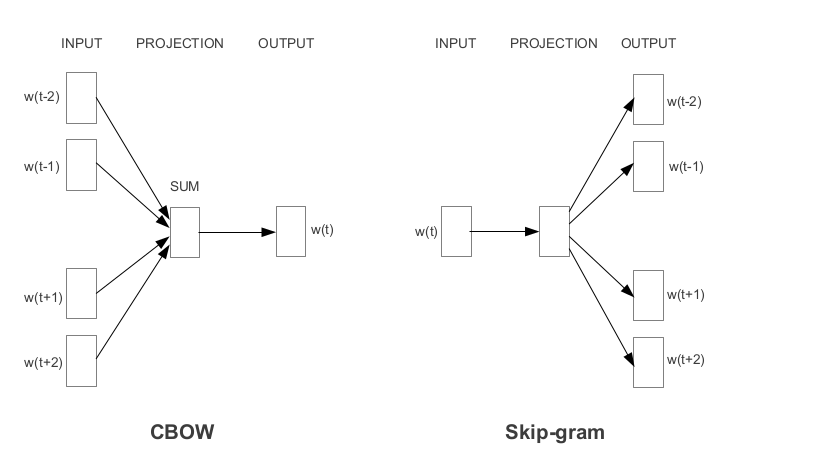



The major distinction between CBOW and skip-gram models is in the task that the neural network is given as above.

e.g. consider the sentence: I have failed at times

In the case of CBOW, the task is to predict the focal word (failed) from the context (I, have, at, times). 

Conversely, for skip-gram, the task is to predict the context words (I, have, at, times) from the focal word (failed).

In practice we’ve found the two methods to produce broadly similar results. According to one of the inventors of Word2Vec, Tomas Mikolov

Skip-gram: works well with small amount of the training data, represents well even rare words or phrases. CBOW: several times faster to train than the skip-gram, slightly better accuracy for the frequent words

I will use Google pre-trained word2vec model. It is trained on part of Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases. 

## **3.2) Neural Network**

## **3.2.1) Response to Claim 1**

Dilated CNN and CNN will be used to repond to claim 1. The description of their structures are found below

## **Dilated CNN**
CNNs found to be better in training as well as to extract high-level semantic features for the text classification based on social media. (Alam, Abid, Guangpei, & Yunrong, 2020) says CNNs can perform feature extraction and classification on a jointly trained task. However, CNNs is not capable of handling long term semantic features over input sequence. Furthermore, to capture long term semantic feature, CNN needs to rely on stacking multiple layers for convolution and pooling.

Therefore, Dilated Convolutional Neural Network(D-CNN) is a better choice proposed by (Alam, Abid, Guangpei, & Yunrong, 2020)'s paper. It introduces another hyper-parameter - dilation rate to the receptive layer to increase the size of the receptive field to capture more information by placing zeros in the filter components.

The structure of the D-CNN proposed:

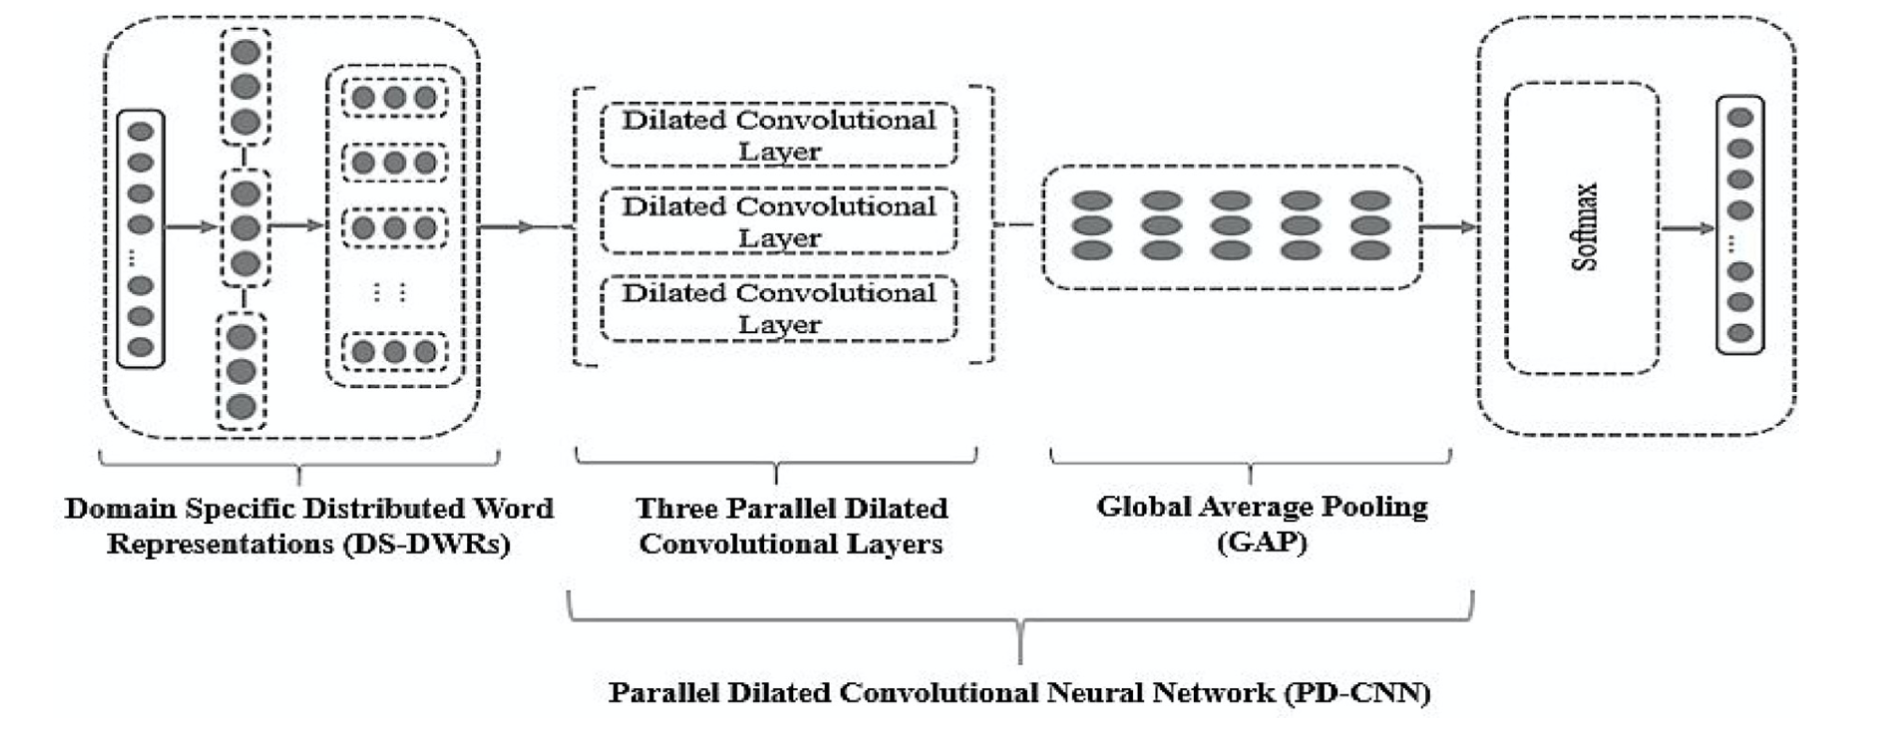

*Figure 1: Three parallel dilated convolution layer (Alam, Abid, Guangpei, & Yunrong, 2020)* 

**The structure of the D-CNN proposed by (Alam, Abid, Guangpei, & Yunrong, 2020):**

**1. Word embedding layer**

**2. Three parallel two-dimensional dilated convolutional layers**  
which have a particular feature maps (F1,F2,F3) with respective dilation convolutions(1,2,4) and size of receptive field related to each
element as ((3×3),(7x7),(15x15))


The dilated convolutions enables to extract the semantics with the exponential growth in the size of the receptive field without compromising on dimensions. These empowers the association of distant elements without expanding the parameters. The dilated operation by employing different dilation rates (1,2,4) increase the convolution kernel over several scales. The model is capable of extracting the long term semantic features by utilizing low dilation rates in the interest of words and a sentence through higher dilation rates. Therefore, with increasing order of dilation rates(1,2,4), the highest layer not only processes information at the long distance and diminishes the impact of containing insignificant data.


**3. Global average pooling layer**

GAP focused on the average value associated with each feature map instead of involving a fully connected layer related to a particular feature map. This average value consists of a feature map activates a specific value for each class, and subsequently, the vector passed into the softmax function.



**Performance by (Alam, Abid, Guangpei, & Yunrong, 2020)'s architecture**

From(Alam, Abid, Guangpei, & Yunrong, 2020), their experiments examine different possibilities and appropriate parameters. These include activation functions(RELU, tanh and R-RELU), number of neurons, number of hidden layer(90,185,250), epochs (from 10 to 50), optimization algorithm (SGD, Adam, RMSProp) and filter size ((2,2,2 /2,2,3 /2,2,4).

Performance: 

*   Utilization of more hidden layers does not result in efficient improvement
*   the optimization through RMSprop produces the best precision 78.11% with (R-RELU) compared to the other two achitectures
* Optimizer Adam achieved good accuracy consistently over the three datasets
*   In terms of batch size, best accuracy obtained on their datasets is 76.29% and 75.88%, with batch sizes of 64 and 128.







## **First architecture to be used in my experiment: Dilated CNN**

As (Alam, Abid, Guangpei, & Yunrong, 2020)'s paper has mentioned that adding more hidder layers do not need to efficient improvement. Thus, I will only use 4 hidden layers consisting of 3 parallel convolutional layers and 1 global average pooling layer. I will also only use one dimensional dilated convolutional layers instead of two dimensional dilated convolutional layers as the dimension of my input is one. 

**1. Word embedding layer**

GloVe or Word2Vec

**2. Three parallel one-dimensional dilated convolutional layers**

In each of the 3 parallel convolutional layers: 90 neurons are used as using too many neurons could lead to overfitting. Each neuron applies the activation function Relu as Relu can handle the problem of vanishing gradient as it bounds the gradients for being too small during training. Each layer has kernel size of (3). The layers are with dilation rate (1,2,4) respectively as proposed by the paper. Thus, size of receptive field related to each layer as ((3),(7),(15))

The dilated convolutions enables to extract the semantics with the exponential growth in the size of the receptive field without compromising on dimensions. These empowers the association of distant elements without expanding the parameters. The dilated operation by employing different dilation rates (1,2,4) increase the convolution kernel over several scales. The model is capable of extracting the long term semantic features by utilizing low dilation rates in the interest of words and a sentence through higher dilation rates. Therefore, with increasing order of dilation rates(1,2,4), the highest layer not only processes information at the long distance and diminishes the impact of containing insignificant data.

**3. Global average pooling layer**

A global average pooling layer is used which is focused on the average value associated with each feature map instead of involving a fully connected layer related to a particular feature map.

**Optimiser:** Adam is used with learning rate 0.001. I chose Adam as Adam derives from “adaptive moments”, it can be seen as a variant on the combination of RMSProp and momentum, the update looks like RMSProp except that a smooth version of the gradient is used instead of the raw stochastic gradient. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems

**Batchsize** = 64 as it achieved the highest accuracy proposed by (Alam, Abid, Guangpei, & Yunrong, 2020).

Strategy to reduce overfitting as mentioned below will also be adopted 



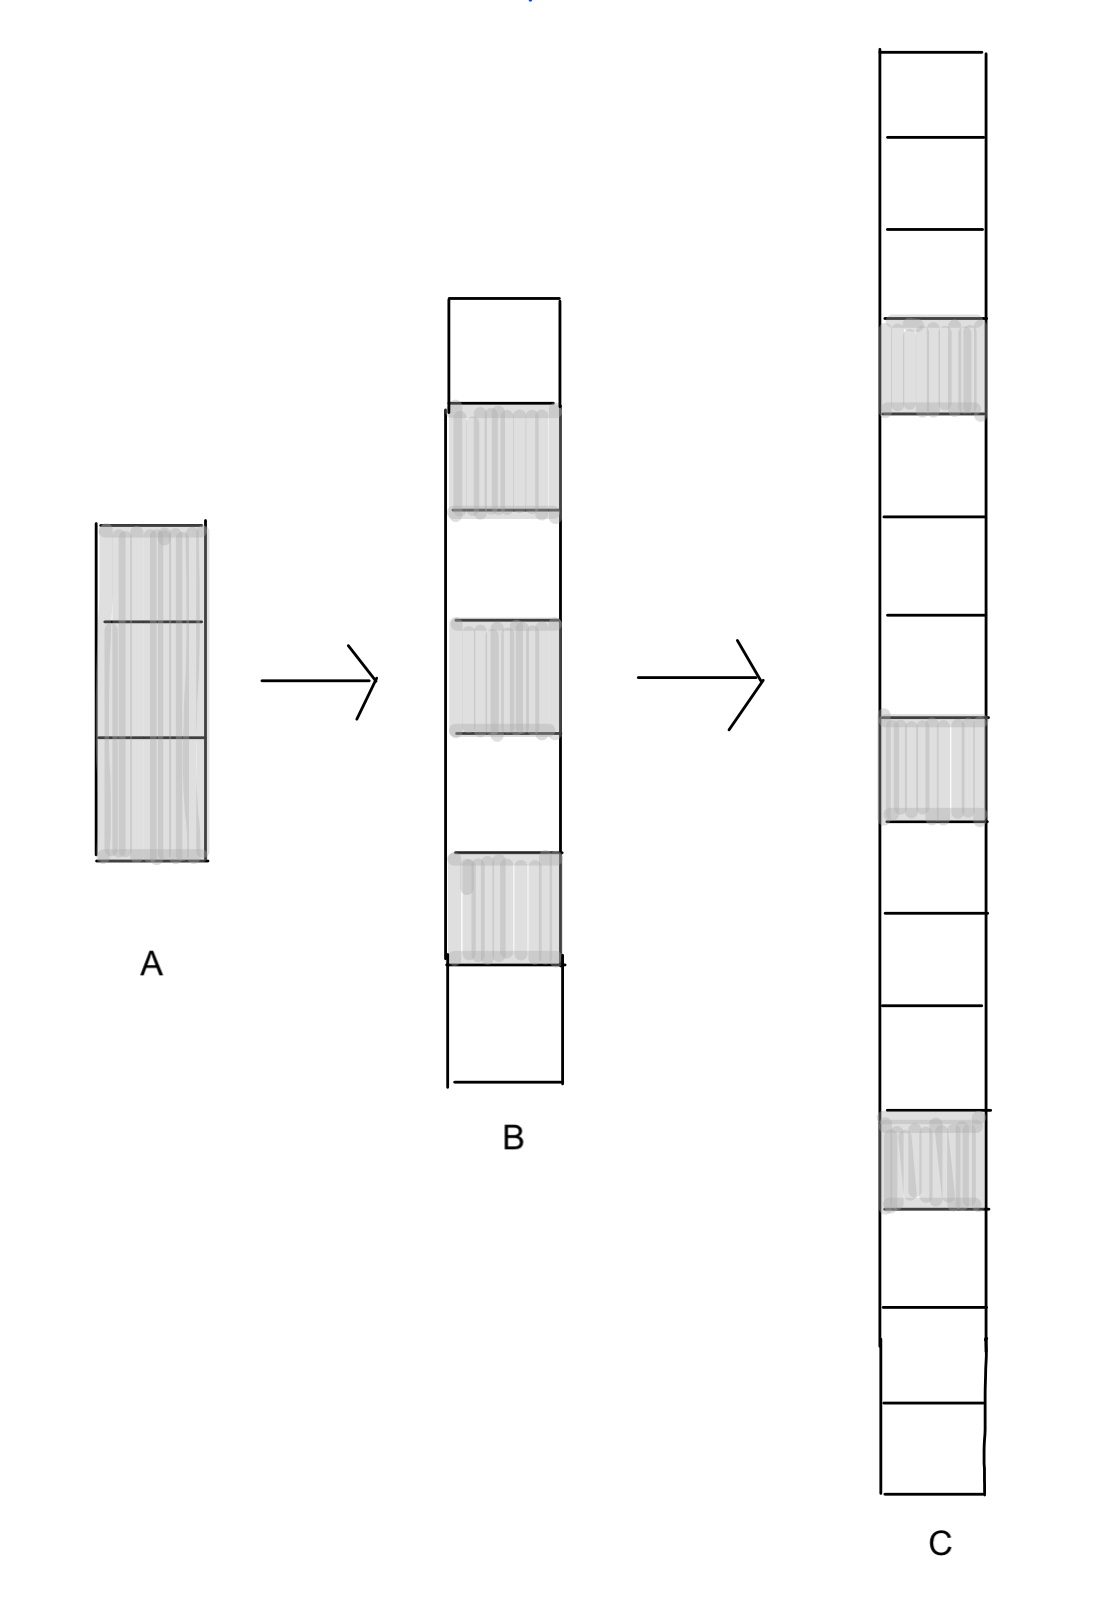

*Figure 2: Three parallel one-dimensional dilated convolutional layer*

In (A), dilation rate = 1 , we have a normal 3x1 convolution with receptive field = 3x1

In (B), dilation rate = 2, so we have a 2-dilated 3x1 convolution that is applied in the output of layer (A) which is a normal convolution. Thus,(B),2-dilated convolution alone the receptive field would be simply 5x1 with the same number of parameters.

In (C), dilation rate = 4, by applying a 4-dilated 3x1 convolution, each element in the third sequential conv layer now has a receptive field of 15×1. 

As a result, the receptive field grows exponentially while the number of parameters grows 



## **Second architecture to be used in my experiment: CNN**

The only difference bewteen the structure of the CNN and Dilated-CNN that will be used is that the three parallel one-dimensional convolutional layers in the CNN are not dilated. Thus, they have not got any dilation rate parameters. Thus the receptive field size in each layer are the same.

**1. Word embedding layer**
GloVe or Word2Vec

**2. Three parallel one-dimensional convolutional layers**

In each of the 3 parallel convolutional layers: 90 neurons are used as using too many neurons could lead to overfitting. Each neuron applies the activation function Relu as Relu can handle the problem of vanishing gradient as it bounds the gradients for being too small during training. Each layer has kernel size of (3). Thus, size of receptive field related to each layer as ((3),(3),(3))

**3. Global average pooling layer**

A global average pooling layer is used which is focused on the average value associated with each feature map instead of involving a fully connected layer related to a particular feature map.

**Optimiser:** Adam is used with learning rate 0.001. I chose Adam as Adam derives from “adaptive moments”, it can be seen as a variant on the combination of RMSProp and momentum, the update looks like RMSProp except that a smooth version of the gradient is used instead of the raw stochastic gradient. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems

**Batchsize** = 64 as it achieved the highest accuracy proposed by (Alam, Abid, Guangpei, & Yunrong, 2020).

Strategy to reduce overfitting as mentioned below will also be adopted

## **3.2.2) Response to Claim 2**

Bidirectional LSTM and LSTM will be used to repond to claim 2. The description of their structures are found below 

## **Bidirectional LSTM (B-LSTM)**

Recurrent Neural Network (RNN) can mdoel he structural dependency of short text or sentences. However, it is not able to model long term dependency because of its vanishing gradient problem. In text classification, it is important to extract long term semantic feature. Thus LSTM which provides long term dependency is an improved version of RNN 
(Haque, Salama, Lima, Zaman & Rajshahi, 2020). LSTM only preserves information of the past because the only inputs it has seen are from the past.

Past information is not good enough for text classification. Future informatiom is also needed to understand the whole text better. Thus, with Bidirectional LSTM model can better use the text sequence relationship to learn sentence semantics, store contextual information while taking into account future contextual information (Song, Zhao, Liu, &amp; Zhao, 2018). Using bidirectional LSTM (B-LSTM) will run the inputs in two ways, one from past to future and one from future to past. What differs this approach from unidirectional is that in the B-LSTM has got one addional hidden layers so two different hidden layers in total, where in the first one the output for each sequence is calculated in a forward way (bring past information forward), and the output for each sequence in the second one is calculated backwards (bring future information backward).

**Performance by (Song, Zhao, Liu, &amp; Zhao, 2018)**

From (Song, Zhao, Liu, &amp; Zhao, 2018)'s paper, it has shown that B-LSTM achieves a higher accuracy rate than LSTM based on a biniary classification dataset of total size 7000. 



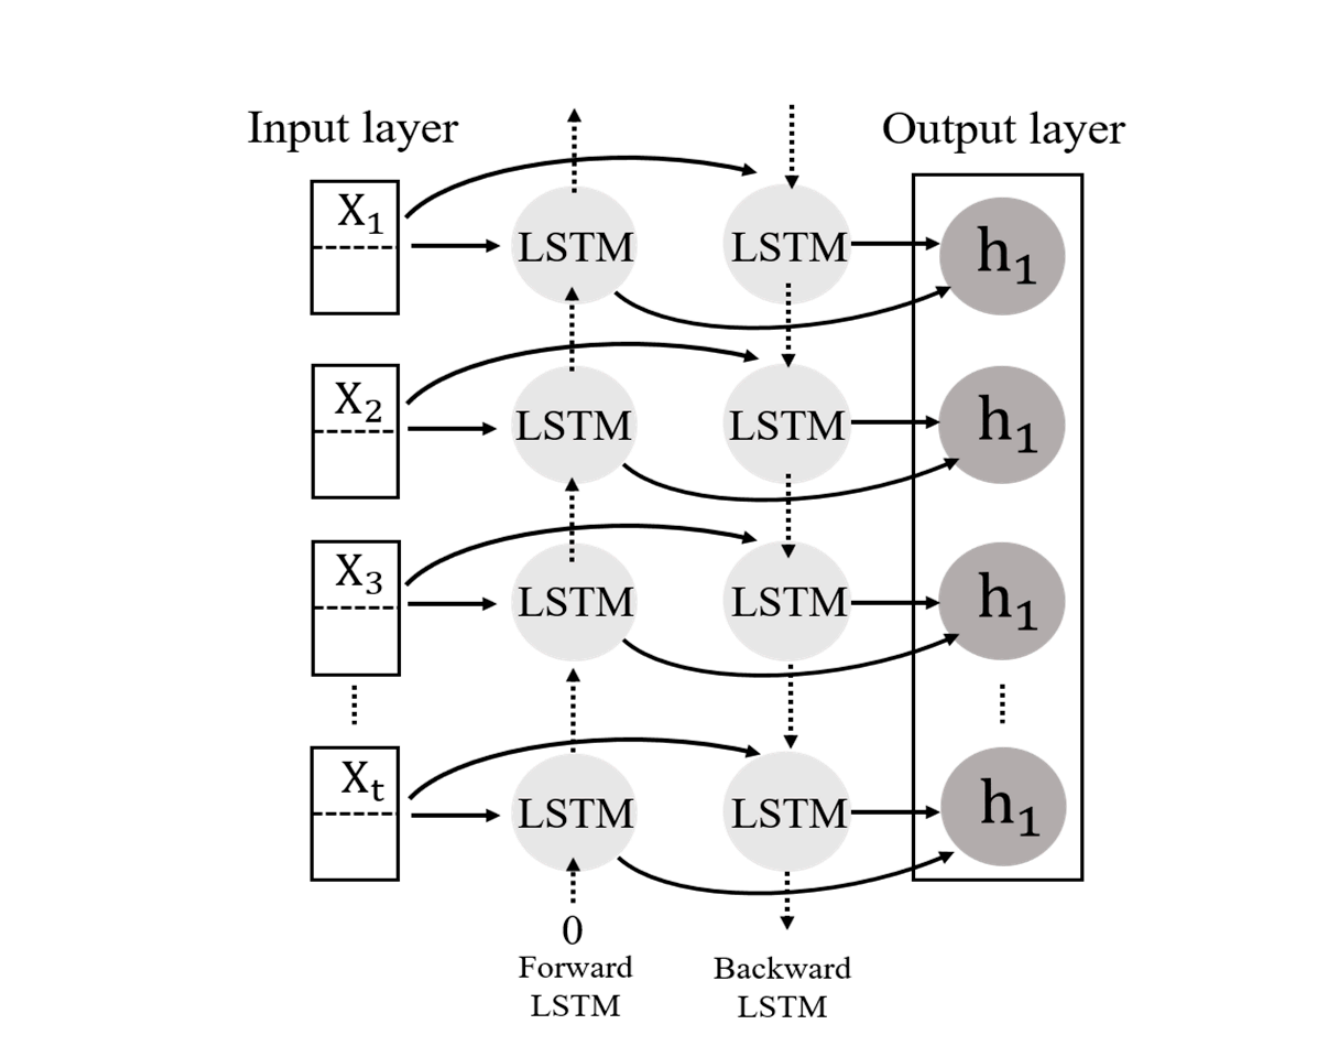

*Figure 3: Bidirectional LSTM architecture (Jang, Kim, Harerimana, Kang, & Kim, 2020)*

## **Third architecture to be used in my experiment: B-LSTM**

**1. Word embedding layer**

GloVe or Word2Vec

**2. one Bidirectional LSTM layer**

90 neurons are used as using too many neurons could lead to overfitting. Each neuron applies the activation function Sigmoid.

**3. Global max pooling layer**

**Optimiser:** Adam is used with learning rate 0.001. I chose Adam as Adam derives from “adaptive moments”, it can be seen as a variant on the combination of RMSProp and momentum, the update looks like RMSProp except that a smooth version of the gradient is used instead of the raw stochastic gradient. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems

**Batchsize** = 64

Strategy to reduce overfitting as mentioned above will also be adopted

## **Fourth architecture to be used in my experiment: LSTM**

The only difference bewteen the structure of the LSTM and B-LSTM that will be used is that LSTM structure uses one LSTM layer instead of the bidirectional LSTM layer. 

**1. Word embedding layer**

GloVe or Word2Vec

**2. one LSTM layer**

90 neurons are used as using too many neurons could lead to overfitting. Each neuron applies the activation function Sigmoid.

**3. Global max pooling layer**

Optimiser: Adam is used with learning rate 0.001. I chose Adam as Adam derives from “adaptive moments”, it can be seen as a variant on the combination of RMSProp and momentum, the update looks like RMSProp except that a smooth version of the gradient is used instead of the raw stochastic gradient. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems

Batchsize = 64

Strategy to reduce overfitting as mentioned above will also be adopted

## **3.2.3) Response to Claim 3**

B-LSTM-CNN and B-LSTM will be used to repond to claim 3. B-LSTM structure is already defined above. The description of the B-LSTM structures is found below.

## **B-LSTM - CNN**

(Song, Zhao, Liu, &amp; Zhao, 2018)'s paper has proposed B-LSTM-CNN architecture as the best model which is better than the B-LSTM and CNN-B-LSTM. In the BLSTM- CNNN architecture, the initial bidirectional LSTM layer act as an encoder, for every token in the input, there is an output token that contains information not only of the original token, but all other tokens. Then, the CNN layer find local patterns using this richer representation of the original input.

**Performance by (Song, Zhao, Liu, &amp; Zhao, 2018)'s paper:**
The reason why B-LSTM-CNN outperforms B-LSTM is that having CNN layer allows for searching local patterns. B-LSTM-CNN outperforms CNN-B-LSTM becuse the initial convolutional layer of the CNN-B-LSTM is loosing some of the text’s sequence information. This makes the bidirectional LSTM layer act as just a fully connected layer (Song, Zhao, Liu, &amp; Zhao, 2018).

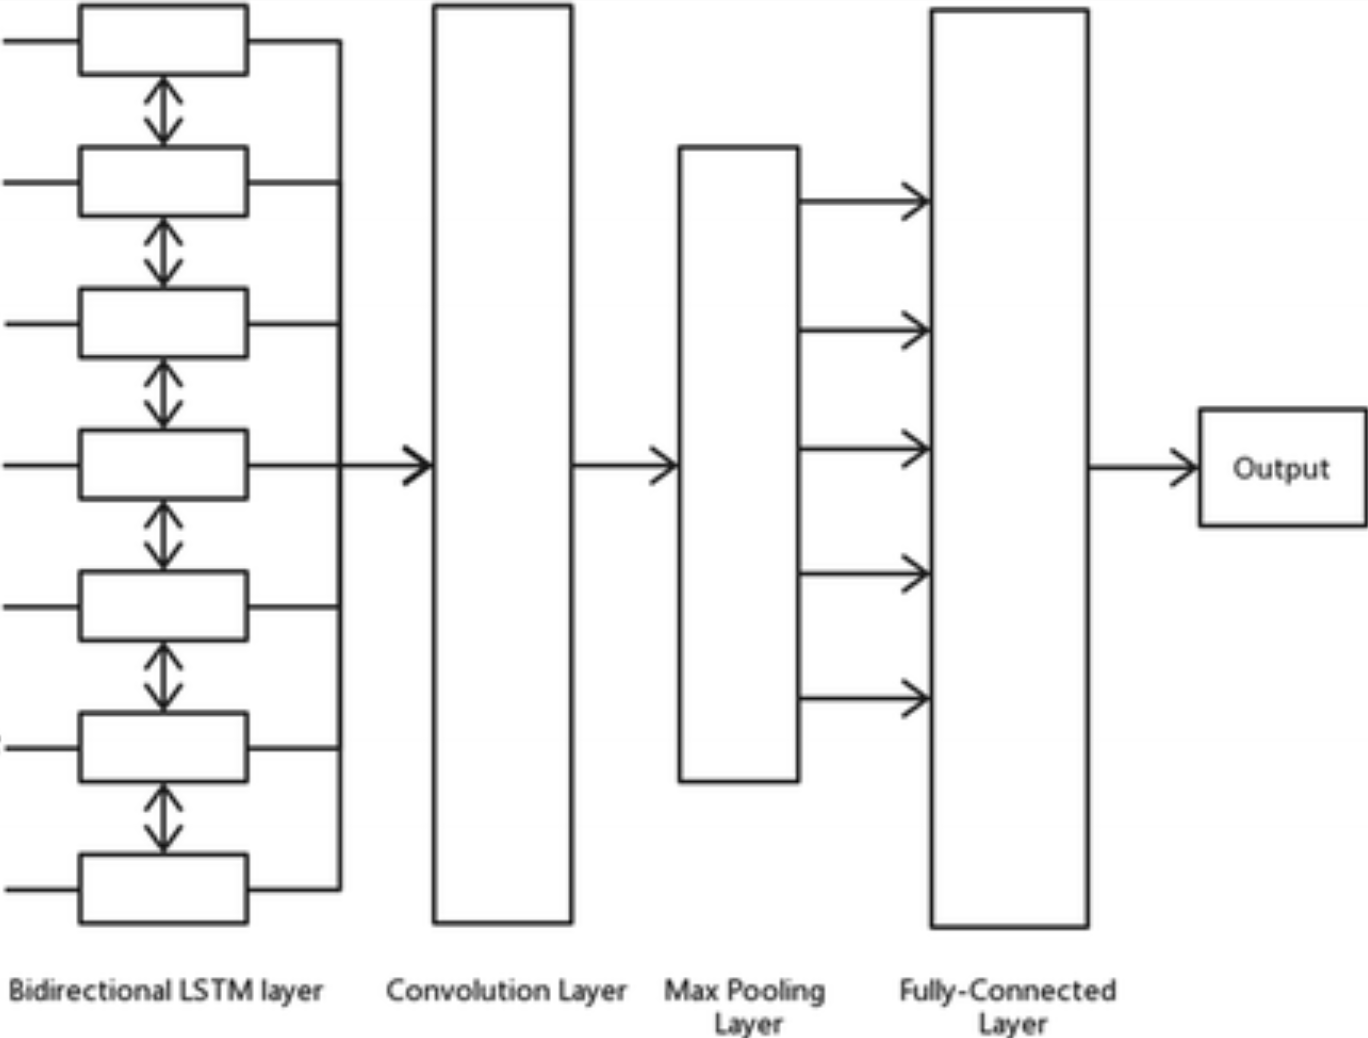

*Figure 4: B-LSTM-CNN Architecture (Song, Zhao, Liu, &amp; Zhao, 2018)*

## **Fifth architecture to be used in my experiment: B-LSTM-CNN**

**1. Word embedding layer**

GloVe or Word2Vec

**2. one Bidirectional LSTM layer**

90 neurons are used as using too many neurons could lead to overfitting. Each neuron applies the activation function Sigmoid

**3. one one-dimensional convolutional layer**

90 neurons are used as using too many neurons could lead to overfitting. Each neuron applies the activation function Relu as Relu can handle the problem of vanishing gradient as it bounds the gradients for being too small during training.

**4. Global max pooling layer**

**Optimiser:** Adam is used with learning rate 0.001. I chose Adam as Adam derives from “adaptive moments”, it can be seen as a variant on the combination of RMSProp and momentum, the update looks like RMSProp except that a smooth version of the gradient is used instead of the raw stochastic gradient. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems

**Batchsize** = 64

Strategy to reduce overfitting as mentioned below will also be adopted

## **3.2.4) Response to Claim 4**

B-LSTM-D-CNN and the other architecturs mentioned above will be used to repond to claim 4. 

B-LSTM-Dilated-CNN structure is definded as below. It is a hybrid model based on B-LSTM and D-CNN.

## **Sixth architecture to be used in my experiment: B-LSTM-D-CNN**

**1. Word embedding layer**

GloVe or Word2Vec

**2. one Bidirectional LSTM layer**

90 neurons are used as using too many neurons could lead to overfitting. Each neuron applies the activation function Sigmoid

**3. Three parallel one-dimensional dilated convolutional layers**

In each of the 3 parallel convolutional layers: 90 neurons are used as using too many neurons could lead to overfitting. Each neuron applies the activation function Relu as Relu can handle the problem of vanishing gradient as it bounds the gradients for being too small during training. Each layer has kernel size of (3). The layers are with dilation rate (1,2,4) respectively as proposed by the paper. Thus, size of receptive field related to each layer as ((3),(7),(15))

The dilated convolutions enables to extract the semantics with the exponential growth in the size of the receptive field without compromising on dimensions. These empowers the association of distant elements without expanding the parameters. The dilated operation by employing different dilation rates (1,2,4) increase the convolution kernel over several scales. The model is capable of extracting the long term semantic features by utilizing low dilation rates in the interest of words and a sentence through higher dilation rates. Therefore, with increasing order of dilation rates(1,2,4), the highest layer not only processes information at the long distance and diminishes the impact of containing insignificant data.

**4. Global max pooling layer**

**Optimiser:** Adam is used with learning rate 0.001. I chose Adam as Adam derives from “adaptive moments”, it can be seen as a variant on the combination of RMSProp and momentum, the update looks like RMSProp except that a smooth version of the gradient is used instead of the raw stochastic gradient. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems

**Batchsize** = 64

Strategy to reduce overfitting as mentioned below will also be adopted

## **4) Strategy to reduce overfitting**

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. Reduving overfitting is crucial to obtain better performance of the model on new data. I will use the following two methods to reduce overfitting when builing my deep learning architecture:


1.   **Drop out** - Drop out operation randomly selects some neurons in a network layer with the dropout parameter and discards their input or output features (set to 0). e.g. setting a drop out rate of 0.5 is equivalent to set half of the neurons in a layer of input or output to 0. The reason why drop out can reduce overfitting is that it can capture more randomness. It introduces noise into the output value of the network layer, breaking the inconspicuous accidental mode (Long, Zhou, &amp; Ou, 2019).

2.   **Early Stopping** - The principle of early stopping is that when the performance of the model on the test set is no as well, we stop training. In the Keras architecture, we use the callbacks function to terminate the training.The callbacks record the output values for each epoch. It has two main parameters has to be set: monitor and patience. In my experiement, I will set monitor as validation loss and patience as 10. This means that if  the value of the validation loss  does not decease during 10 epochs, the model will automatically stop training. Because if not stop training, overfitting will happen.

3.   **L2 Regularization** - L2 regularization is also called weight attenuation. Cost function= Loss+(λ/2m)∥w∥^2. L2 penalises larger weight by adding an additional term to the cost function. I modify the error function I use during training to include an additional term that adds a fraction (λ/2m) of the sum of the squared values of the weights. So larger weight values lead to larger error, and therefore the training algorithm favors and generates small weight values. In neural network, complex model are more prone to over-fitting. Thus, by using L2 regularization which simplify the model can effective reduce overfitting.



## **5) Metrics for Performance**

In the following experimental analysis,the Precision and Recall as the index to evaluate the sentiment analysis, the overall performance using Accuracy and F1 Score as an indicator. Since the dataset is now balanced, Accuracy works the best when data is balacned. So, my main focus will be on accuracy to evaluate the performance. 

Description of each metric:

* **Accuracy** = how often predictions equal to label. It is a ratio of correctly predicted observation to the total observations.

*   **Precision = TP/(TP+FP)**, the ratio of correctly predicted positive observations to the total predicted positive observations. 
    
    where TP = True Positives (These are the correctly predicted positive values which means that the value of actual class is 1 and the value of predicted class is also 1), FP = False Positives (When actual class is -1 and predicted class is 1)

*   **Recall = TP/TP+FN**, the ratio of correctly predicted positive observations to the all observations in actual class - 1

    where TP = True Positives (These are the correctly predicted positive values which means that the value of actual class is 1 and the value of predicted class is also 1), FN = False Negatives (When actual class is 1 but predicted class in -1)

*  **F1 Score = 2*(Recall * Precision) / (Recall + Precision)**, is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. 



## **6) Implementation of My Experiment**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

import keras 
from keras.metrics import Precision, Recall
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import RNN,Bidirectional,Embedding, LSTM, GRU, Flatten, Conv1D, Input,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import to_categorical

**Load Data**

In [132]:
from google.colab import files
uploaded = files.upload()

Saving Reddit_Data.csv to Reddit_Data (1).csv


In [133]:
#import dataset 
import io
df = pd.read_csv(io.BytesIO(uploaded['Reddit_Data.csv']))

#drop any missing values
df.dropna(inplace = True)

#Since the related work and research methods I am going to use are based on two-class classification
#I will work on catergory positive(1) and category negative (-1)
#drop the observations with category neurtral (0)

df = df[df["category"] !=0]
df.head

<bound method NDFrame.head of                                            clean_comment  category
0       family mormon have never tried explain them t...         1
1      buddhism has very much lot compatible with chr...         1
2      seriously don say thing first all they won get...        -1
4      for your own benefit you may want read living ...         1
5      you should all sit down together and watch the...        -1
...                                                  ...       ...
37236   fan modi but some the best people ever met li...         1
37240  nice same shock laga effect the night demoneti...         1
37243  this agree why push make other nations either ...        -1
37245  kya bhai pure saal chutiya banaya modi aur jab...         1
37247                                         haha nice          1

[24107 rows x 2 columns]>

 1    15830
-1     8277
Name: category, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


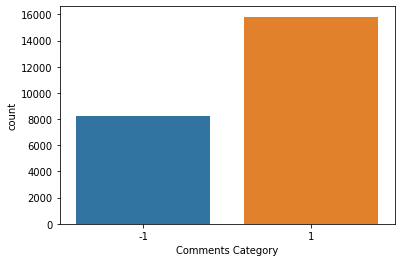

In [134]:
import seaborn as sns
sns.countplot(df.category)
plt.xlabel('Comments Category')

print(df.category.value_counts())


Since the dataset is heavily imbalanced, Category 1 is almost a double of Category -1. Thus, I will randomly select 8000 comments from each catrgory, resulting in 16000 comments in total.

Although this leads to reduction in the number of comments avilable for the following maching learning proposed methods, the proposed methods used by (Alam, Abid, Guangpei, & Yunrong, 2020) have worked on relatively small datasets (size 810 and 7481 respectively) compared to us.(Song, Zhao, Liu, &amp; Zhao)'s paper has also only used a dataset with a total size of 7000.  Thus, our dataset is sufficiently large.

In [135]:
# randomly sample 8000 comments from each class
np.random.seed(3)
df = pd.concat([df.loc[df['category'] == 1].sample(8000), df.loc[df['category'] == -1].sample(8000)], ignore_index = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


-1    8000
 1    8000
Name: category, dtype: int64


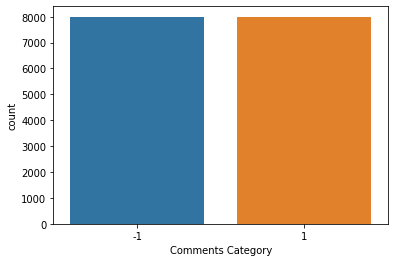

In [136]:
import seaborn as sns
sns.countplot(df.category)
plt.xlabel('Comments Category')

print(df.category.value_counts())

In [137]:
df.head

<bound method NDFrame.head of                                            clean_comment  category
0       feels nice and all but find cyber attacks ran...         1
1      vote for the local good candidate always all e...         1
2                                    mitron vote wisely          1
3      the feet washing was exhibition tokenism its b...         1
4      too much was always ter but was always pushed ...         1
...                                                  ...       ...
15995  egg prices went paid rs3 per egg lower from th...        -1
15996  modiji specifically didn get hands dirty doing...        -1
15997  there lot don know yet first thought was that ...        -1
15998   kejriwal should distribute black note because...        -1
15999   youth who have been rendered numb and unthink...        -1

[16000 rows x 2 columns]>

**Pre proceesing of Data**

In [138]:
#Pre processing of Data
import string
#convert to lower case
df["clean_comment"] = df["clean_comment"].str.lower()

#remove puntuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["clean_comment"] = df["clean_comment"].apply(lambda text: remove_punctuation(text))

#filter out stop words such as 'a', 'the' etc
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["clean_comment"] = df["clean_comment"].apply(lambda text: remove_stopwords(text))

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_comment,category
0,feels nice find cyber attacks ransomware non s...,1
1,vote local good candidate always elect good pe...,1
2,mitron vote wisely,1
3,feet washing exhibition tokenism best,1
4,much always ter always pushed carpet bhakts,1


In [139]:
print(df['clean_comment'][1])

vote local good candidate always elect good people parliament figure way run country decently years really hate party vote local parties independents drop good candidate filter voting get winning vote democracy exactly gambling casino personal ego stake future constituency perfectly fine vote independents good qualifications many instances independents good work decades rule big parties failed


In [140]:
def to_sentiment(rating):
  rating = int(rating)
  if rating == -1:
    return 0
  elif rating == 1 :
    return 1

In [141]:
df['sentiment'] = df.category.apply(to_sentiment)
df.head

<bound method NDFrame.head of                                            clean_comment  category  sentiment
0      feels nice find cyber attacks ransomware non s...         1          1
1      vote local good candidate always elect good pe...         1          1
2                                     mitron vote wisely         1          1
3                  feet washing exhibition tokenism best         1          1
4            much always ter always pushed carpet bhakts         1          1
...                                                  ...       ...        ...
15995  egg prices went paid rs3 per egg lower previou...        -1          0
15996  modiji specifically get hands dirty time like ...        -1          0
15997  lot know yet first thought atreus yeah think h...        -1          0
15998  kejriwal distribute black note insure black wo...        -1          0
15999  youth rendered numb unthinking opium religious...        -1          0

[16000 rows x 3 columns]>

In [142]:
# Train and Test split
X_train, X_test,y_train, y_test = train_test_split(df['clean_comment'], df['sentiment'], 
                                                   test_size = 0.3, random_state = 42, shuffle = True)

In [143]:
#Making the tokinzer ready for using 
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(list(X_train))

#converting text into integer sequences
X_train_seq  = tokenizer.texts_to_sequences(X_train) 
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max([len(x) for x in X_train_seq])
max_words = len(tokenizer.word_index) + 1

#for deep learning for text classificatin, need to make sure that each input sequence is of the same length
#thus for different lengths of inputs is padding with zero to a fixed length (maximum length of the input sequence)
X_train = pad_sequences(X_train_seq, maxlen=max_length, padding = 'post')
X_test= pad_sequences(X_test_seq, maxlen=max_length, padding = 'post')

In [144]:
print(max_words)

30294


In [145]:
print(X_train.shape)

(11200, 845)


In [146]:
# number of classes
print('Number of classes: ', len(np.unique(y_train)))

Number of classes:  2


In [147]:
#one hot encoding for the category -1,1
y_train = to_categorical(y_train,2)
y_test = to_categorical(y_test,2)

In [148]:
print(y_train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [149]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11200, 845)
(4800, 845)
(11200, 2)
(4800, 2)


**GloVe Word Embedding**

In [150]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [151]:
file_path ='/content/gdrive/MyDrive/10/glove.6B.100d.txt'

In [152]:
# load the whole embedding into memory
embeddings_index1 = dict()
f = open(file_path)

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index1[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index1))

Loaded 400000 word vectors.


In [153]:
#create a weight matrix for words in training docs
embedding_matrix1 = np.zeros((max_words, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index1.get(word)
    if embedding_vector is not None:
        embedding_matrix1[i] = embedding_vector

**Word2Vec Word Embedding**

In [154]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gunzip GoogleNews-vectors-negative300.bin.gz

--2021-04-11 20:24:42--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.92.62
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.92.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  46.7MB/s    in 34s     

2021-04-11 20:25:16 (45.9 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]

gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [155]:
import gensim

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

print ("# of words", len(model.vocab))
print ("# of vectors", len(model.vectors))
print ("the first 10 elements of embedding vector for the word king:",
       model.vectors[model.vocab["king"].index][:10])

# of words 3000000
# of vectors 3000000
the first 10 elements of embedding vector for the word king: [ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125]


In [156]:
filename = 'google_word2vec.txt'
model.save_word2vec_format(filename, binary = False)

In [157]:
# load the whole embedding into memory
embeddings_index2 = dict()
f = open(filename)

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index2[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index2))

Loaded 3000000 word vectors.


In [158]:
#create a weight matrix for words in training docs
embedding_matrix2 = np.zeros((max_words, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index2.get(word)
    if embedding_vector is not None:
        embedding_matrix2[i] = embedding_vector

## **CNN - using Glove word embedding layer**

In [159]:
#Dilated CNN- using GloVe word embedding layter
modelG0=Sequential()

#embedding layer
modelG0.add(Embedding(max_words,100,weights=[embedding_matrix1],input_length=max_length,trainable=False)) 

#three parallel dilated 2-d convolutional layers
modelG0.add(tf.keras.layers.Conv1D(90,3, padding = "valid",activation = "relu"))
modelG0.add(tf.keras.layers.Conv1D(90,3, padding = "valid", activation = "relu"))
modelG0.add(tf.keras.layers.Conv1D(90,3, padding = "valid", activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)))
modelG0.add(Dropout(0.1))

modelG0.add(tf.keras.layers.GlobalAveragePooling1D())
modelG0.add(Flatten())
modelG0.add(Dropout(0.3))
modelG0.add(Dense(2, activation='softmax'))

In [160]:
# Compiling the model
modelG0.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
               metrics = ['accuracy'])

modelG0.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 845, 100)          3029400   
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 843, 90)           27090     
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 841, 90)           24390     
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 839, 90)           24390     
_________________________________________________________________
dropout_26 (Dropout)         (None, 839, 90)           0         
_________________________________________________________________
global_average_pooling1d_3 ( (None, 90)                0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 90)              

In [161]:
from keras.callbacks import EarlyStopping
#add early stopping: stop training if val_loss hasn't decreased for 10 epochs
callbacks = [EarlyStopping(monitor='val_loss', patience = 10)]

In [162]:
# Training the model
historyG0 = modelG0.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, steps_per_epoch = 50, verbose = 1, 
                    validation_data = (X_test, y_test),shuffle = True, callbacks = callbacks)

Epoch 1/50
50/50 [==============================] - 2s 28ms/step - loss: 1.3374 - accuracy: 0.5198 - val_loss: 0.8593 - val_accuracy: 0.5025
Epoch 2/50
50/50 [==============================] - 1s 25ms/step - loss: 0.8025 - accuracy: 0.5187 - val_loss: 0.7084 - val_accuracy: 0.5638
Epoch 3/50
50/50 [==============================] - 1s 24ms/step - loss: 0.6965 - accuracy: 0.5899 - val_loss: 0.6758 - val_accuracy: 0.5935
Epoch 4/50
50/50 [==============================] - 1s 24ms/step - loss: 0.6783 - accuracy: 0.6081 - val_loss: 0.6658 - val_accuracy: 0.6106
Epoch 5/50
50/50 [==============================] - 1s 24ms/step - loss: 0.6721 - accuracy: 0.6227 - val_loss: 0.6579 - val_accuracy: 0.6198
Epoch 6/50
50/50 [==============================] - 1s 24ms/step - loss: 0.6614 - accuracy: 0.6111 - val_loss: 0.6630 - val_accuracy: 0.6281
Epoch 7/50
50/50 [==============================] - 1s 24ms/step - loss: 0.6532 - accuracy: 0.6458 - val_loss: 0.6402 - val_accuracy: 0.6463
Epoch 8/50
50

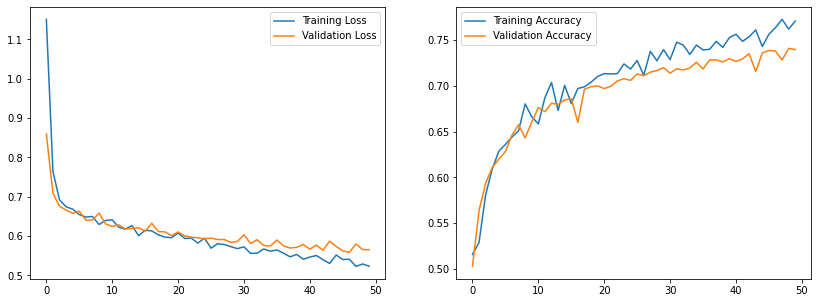

In [163]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(historyG0.history['loss'], label='Training Loss')
ax1.plot(historyG0.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(historyG0.history['accuracy'], label='Training Accuracy')
ax2.plot(historyG0.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [164]:
from sklearn.metrics import precision_score, recall_score, f1_score
probs = modelG0.predict(X_test, verbose=0)
classes = np.argmax(probs,axis=1)

# accuracy
loss, accuracy = modelG0.evaluate(X_test, y_test, verbose = 0)
print('Accuracy  : {:.4f}'.format(accuracy))
# precision tp / (tp + fp)
print('precision  : ',precision_score(y_test[:,1], classes))
# recall: tp / (tp + fn)
print('recall : ',recall_score(y_test[:,1], classes))
# f1: 2 tp / (2 tp + fp + fn)
print('f1 score : ',f1_score(y_test[:,1], classes))

Accuracy  : 0.7398
precision  :  0.7799711121810303
recall :  0.6716417910447762
f1 score :  0.7217643127645356


## **CNN - using Word2Vec word embedding layer**

In [165]:
#Dilated CNN- using GloVe word embedding layter
modelW0=Sequential()

#embedding layer
modelW0.add(Embedding(max_words,300,weights=[embedding_matrix2],input_length=max_length,trainable=False)) 

#three parallel dilated 2-d convolutional layers
modelW0.add(tf.keras.layers.Conv1D(90,3, padding = "valid",activation = "relu"))
modelW0.add(tf.keras.layers.Conv1D(90,3, padding = "valid", activation = "relu"))
modelW0.add(tf.keras.layers.Conv1D(90,3, padding = "valid", activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)))
modelW0.add(Dropout(0.1))

modelW0.add(tf.keras.layers.GlobalAveragePooling1D())
modelW0.add(Flatten())
modelW0.add(Dropout(0.3))
modelW0.add(Dense(2, activation='softmax'))

In [166]:
# Compiling the model
modelW0.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
               metrics = ['accuracy'])

modelW0.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 845, 300)          9088200   
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 843, 90)           81090     
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 841, 90)           24390     
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 839, 90)           24390     
_________________________________________________________________
dropout_28 (Dropout)         (None, 839, 90)           0         
_________________________________________________________________
global_average_pooling1d_4 ( (None, 90)                0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 90)              

In [167]:
# Training the model
historyW0 = modelW0.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, steps_per_epoch = 50, verbose = 1, 
                    validation_data = (X_test, y_test),shuffle = True, callbacks = callbacks)

Epoch 1/50
50/50 [==============================] - 3s 51ms/step - loss: 1.3381 - accuracy: 0.5064 - val_loss: 0.8577 - val_accuracy: 0.5025
Epoch 2/50
50/50 [==============================] - 2s 47ms/step - loss: 0.8042 - accuracy: 0.5155 - val_loss: 0.7060 - val_accuracy: 0.5433
Epoch 3/50
50/50 [==============================] - 2s 47ms/step - loss: 0.7020 - accuracy: 0.5445 - val_loss: 0.6795 - val_accuracy: 0.5731
Epoch 4/50
50/50 [==============================] - 2s 47ms/step - loss: 0.6721 - accuracy: 0.5873 - val_loss: 0.6578 - val_accuracy: 0.6317
Epoch 5/50
50/50 [==============================] - 2s 47ms/step - loss: 0.6621 - accuracy: 0.6422 - val_loss: 0.6707 - val_accuracy: 0.6340
Epoch 6/50
50/50 [==============================] - 2s 47ms/step - loss: 0.6421 - accuracy: 0.6515 - val_loss: 0.6442 - val_accuracy: 0.6577
Epoch 7/50
50/50 [==============================] - 2s 47ms/step - loss: 0.6463 - accuracy: 0.6610 - val_loss: 0.6415 - val_accuracy: 0.6615
Epoch 8/50
50

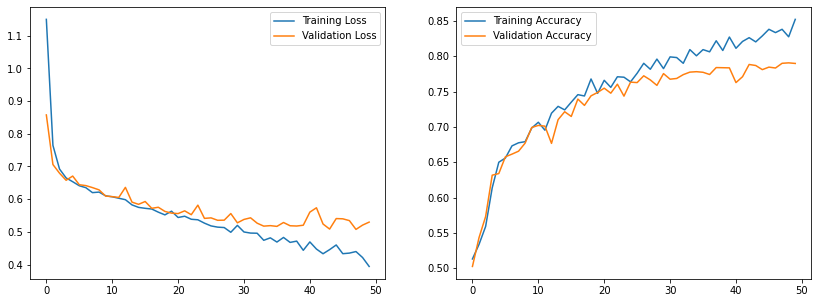

In [169]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(historyW0.history['loss'], label='Training Loss')
ax1.plot(historyW0.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(historyW0.history['accuracy'], label='Training Accuracy')
ax2.plot(historyW0.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [170]:
from sklearn.metrics import precision_score, recall_score, f1_score
probs = modelW0.predict(X_test, verbose=0)
classes = np.argmax(probs,axis=1)

# accuracy
loss, accuracy = modelW0.evaluate(X_test, y_test, verbose = 0)
print('Accuracy  : {:.4f}'.format(accuracy))
# precision tp / (tp + fp)
print('precision  : ',precision_score(y_test[:,1], classes))
# recall: tp / (tp + fn)
print('recall : ',recall_score(y_test[:,1], classes))
# f1: 2 tp / (2 tp + fp + fn)
print('f1 score : ',f1_score(y_test[:,1], classes))

Accuracy  : 0.7898
precision  :  0.8387252535007242
recall :  0.7201492537313433
f1 score :  0.774927503903636


## **Dilated CNN - using GloVe word embedding layer**


In [171]:
#Dilated CNN- using GloVe word embedding layter
modelG1=Sequential()

#embedding layer
modelG1.add(Embedding(max_words,100,weights=[embedding_matrix1],input_length=max_length,trainable=False)) 

#three parallel dilated 2-d convolutional layers
modelG1.add(tf.keras.layers.Conv1D(90,3, padding = "valid", dilation_rate = 1,activation = "relu"))
modelG1.add(tf.keras.layers.Conv1D(90,3, padding = "valid", dilation_rate = 2,activation = "relu"))
modelG1.add(tf.keras.layers.Conv1D(90,3, padding = "valid", dilation_rate = 4,activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)))
modelG1.add(Dropout(0.1))

modelG1.add(tf.keras.layers.GlobalAveragePooling1D())
modelG1.add(Flatten())
modelG1.add(Dropout(0.3))
modelG1.add(Dense(2, activation='softmax'))

In [172]:
# Compiling the model
modelG1.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
               metrics = ['accuracy'])

In [173]:
modelG1.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 845, 100)          3029400   
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 843, 90)           27090     
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 839, 90)           24390     
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 831, 90)           24390     
_________________________________________________________________
dropout_30 (Dropout)         (None, 831, 90)           0         
_________________________________________________________________
global_average_pooling1d_5 ( (None, 90)                0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 90)              

In [174]:
from keras.callbacks import EarlyStopping
#add early stopping: stop training if val_loss hasn't decreased for 10 epochs
callbacks = [EarlyStopping(monitor='val_loss', patience = 10)]

In [175]:
# Training the model
historyG1 = modelG1.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, steps_per_epoch = 50, verbose = 1, 
                    validation_data = (X_test, y_test),shuffle = True, callbacks = callbacks)

Epoch 1/50
50/50 [==============================] - 2s 31ms/step - loss: 1.3363 - accuracy: 0.4925 - val_loss: 0.8571 - val_accuracy: 0.5200
Epoch 2/50
50/50 [==============================] - 1s 27ms/step - loss: 0.8033 - accuracy: 0.5429 - val_loss: 0.7091 - val_accuracy: 0.5406
Epoch 3/50
50/50 [==============================] - 1s 27ms/step - loss: 0.7006 - accuracy: 0.5514 - val_loss: 0.6843 - val_accuracy: 0.5508
Epoch 4/50
50/50 [==============================] - 1s 27ms/step - loss: 0.6839 - accuracy: 0.5773 - val_loss: 0.6804 - val_accuracy: 0.5754
Epoch 5/50
50/50 [==============================] - 1s 27ms/step - loss: 0.6767 - accuracy: 0.5955 - val_loss: 0.6643 - val_accuracy: 0.6019
Epoch 6/50
50/50 [==============================] - 1s 27ms/step - loss: 0.6666 - accuracy: 0.6003 - val_loss: 0.6626 - val_accuracy: 0.6096
Epoch 7/50
50/50 [==============================] - 1s 27ms/step - loss: 0.6610 - accuracy: 0.6411 - val_loss: 0.6602 - val_accuracy: 0.6133
Epoch 8/50
50

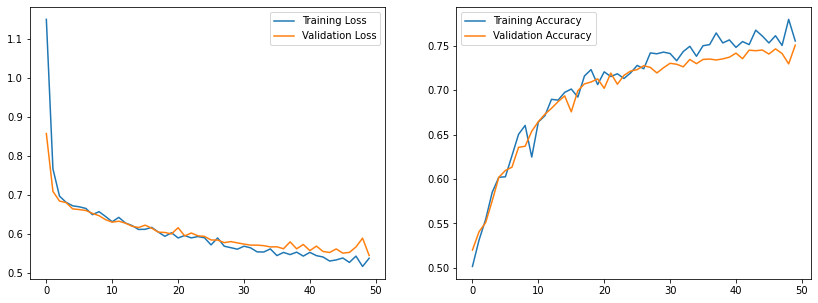

In [176]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(historyG1.history['loss'], label='Training Loss')
ax1.plot(historyG1.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(historyG1.history['accuracy'], label='Training Accuracy')
ax2.plot(historyG1.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [177]:
from sklearn.metrics import precision_score, recall_score, f1_score
probs = modelG1.predict(X_test, verbose=0)
classes = np.argmax(probs,axis=1)

# accuracy
loss, accuracy = modelG1.evaluate(X_test, y_test, verbose = 0)
print('Accuracy  : {:.4f}'.format(accuracy))
# precision tp / (tp + fp)
print('precision  : ',precision_score(y_test[:,1], classes))
# recall: tp / (tp + fn)
print('recall : ',recall_score(y_test[:,1], classes))
# f1: 2 tp / (2 tp + fp + fn)
print('f1 score : ',f1_score(y_test[:,1], classes))

Accuracy  : 0.7506
precision  :  0.7570884468895472
recall :  0.7417081260364843
f1 score :  0.7493193717277488


## **Dilated CNN - using Word2Vec word embedding layer**

In [178]:
#Dilated CNN- using GloVe word embedding layter
modelW1=Sequential()

#embedding layer
modelW1.add(Embedding(max_words,300,weights=[embedding_matrix2],input_length=max_length,trainable=False)) 

#three parallel dilated 1-d convolutional layers
modelW1.add(tf.keras.layers.Conv1D(90,3, padding = "valid", dilation_rate = 1,activation = "relu"))
modelW1.add(tf.keras.layers.Conv1D(90,3, padding = "valid", dilation_rate = 2,activation = "relu"))
modelW1.add(tf.keras.layers.Conv1D(90,3, padding = "valid", dilation_rate = 4,activation = "relu", kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)))
modelW1.add(Dropout(0.1))

modelW1.add(tf.keras.layers.GlobalAveragePooling1D())
modelW1.add(Flatten())
modelW1.add(Dropout(0.3))
modelW1.add(Dense(2, activation='softmax'))

In [179]:
from keras.callbacks import EarlyStopping
#add early stopping: stop training if val_loss hasn't decreased for 10 epochs
callbacks = [EarlyStopping(monitor='val_loss', patience = 10)]

In [180]:
# Compiling the model
modelW1.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
               metrics = ['accuracy', Precision(), Recall()])
modelW1.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 845, 300)          9088200   
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 843, 90)           81090     
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 839, 90)           24390     
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 831, 90)           24390     
_________________________________________________________________
dropout_32 (Dropout)         (None, 831, 90)           0         
_________________________________________________________________
global_average_pooling1d_6 ( (None, 90)                0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 90)              

In [181]:
# Training the model
historyW1 = modelW1.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, steps_per_epoch = 50, verbose = 1, 
                    validation_data = (X_test, y_test),shuffle = True, callbacks=callbacks)

Epoch 1/50
50/50 [==============================] - 4s 60ms/step - loss: 1.3416 - accuracy: 0.5028 - precision_16: 0.5028 - recall_16: 0.5028 - val_loss: 0.8587 - val_accuracy: 0.5354 - val_precision_16: 0.5354 - val_recall_16: 0.5354
Epoch 2/50
50/50 [==============================] - 3s 53ms/step - loss: 0.8035 - accuracy: 0.5232 - precision_16: 0.5232 - recall_16: 0.5232 - val_loss: 0.7104 - val_accuracy: 0.5475 - val_precision_16: 0.5475 - val_recall_16: 0.5475
Epoch 3/50
50/50 [==============================] - 3s 53ms/step - loss: 0.7025 - accuracy: 0.5501 - precision_16: 0.5501 - recall_16: 0.5501 - val_loss: 0.6879 - val_accuracy: 0.5700 - val_precision_16: 0.5700 - val_recall_16: 0.5700
Epoch 4/50
50/50 [==============================] - 3s 53ms/step - loss: 0.6809 - accuracy: 0.5883 - precision_16: 0.5883 - recall_16: 0.5883 - val_loss: 0.6753 - val_accuracy: 0.5856 - val_precision_16: 0.5856 - val_recall_16: 0.5856
Epoch 5/50
50/50 [==============================] - 3s 53ms/

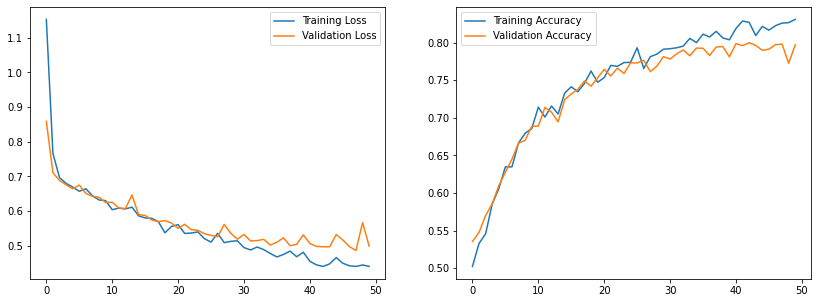

In [182]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(historyW1.history['loss'], label='Training Loss')
ax1.plot(historyW1.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(historyW1.history['accuracy'], label='Training Accuracy')
ax2.plot(historyW1.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [183]:
from sklearn.metrics import precision_score, recall_score, f1_score
probs = modelW1.predict(X_test, verbose=0)
classes = np.argmax(probs,axis=1)

# accuracy
loss, accuracy, precision, recall = modelW1.evaluate(X_test, y_test, verbose = 0)
print('Accuracy  : {:.4f}'.format(accuracy))
# precision tp / (tp + fp)
print('precision  : ',precision_score(y_test[:,1], classes))
# recall: tp / (tp + fn)
print('recall : ',recall_score(y_test[:,1], classes))
# f1: 2 tp / (2 tp + fp + fn)
print('f1 score : ',f1_score(y_test[:,1], classes))


Accuracy  : 0.7971
precision  :  0.7973531844499586
recall :  0.7993366500829188
f1 score :  0.7983436853002069


## **LSTM - using GloVe word embedding layer**

In [107]:
#B-LSTM- using GloVe word embedding layter
from keras.layers import Bidirectional, GlobalMaxPool1D, LSTM

modelG20=Sequential()

#embedding layer
modelG20.add(Embedding(max_words,100,weights=[embedding_matrix1],input_length=max_length,trainable=False)) 

#bidirectional LSTM layer
modelG20.add(LSTM(90, recurrent_activation = 'sigmoid', return_sequences=True, dropout = 0.1,
                               kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)))

#Global Max pooling layer
modelG20.add(tf.keras.layers.MaxPooling1D(padding = 'valid'))

modelG20.add(Flatten())
modelG20.add(Dense(185, activation = 'relu'))
modelG20.add(Dropout(0.3))
modelG20.add(Dense(2, activation='softmax'))

In [108]:
# Compiling the model
modelG20.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
               metrics = ['accuracy', Precision(), Recall()])
modelG20.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 845, 100)          3029400   
_________________________________________________________________
lstm_14 (LSTM)               (None, 845, 90)           68760     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 422, 90)           0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 37980)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 185)               7026485   
_________________________________________________________________
dropout_21 (Dropout)         (None, 185)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 2)               

In [109]:
# Training the model
historyG20 = modelG20.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, steps_per_epoch = 50, verbose = 1, 
                    validation_data = (X_test, y_test),shuffle = True, callbacks=callbacks)

Epoch 1/50
50/50 [==============================] - 6s 92ms/step - loss: 1.8700 - accuracy: 0.5800 - precision_12: 0.5800 - recall_12: 0.5800 - val_loss: 1.0663 - val_accuracy: 0.6700 - val_precision_12: 0.6700 - val_recall_12: 0.6700
Epoch 2/50
50/50 [==============================] - 4s 80ms/step - loss: 0.9766 - accuracy: 0.6595 - precision_12: 0.6595 - recall_12: 0.6595 - val_loss: 0.7497 - val_accuracy: 0.7002 - val_precision_12: 0.7002 - val_recall_12: 0.7002
Epoch 3/50
50/50 [==============================] - 4s 80ms/step - loss: 0.7496 - accuracy: 0.6752 - precision_12: 0.6752 - recall_12: 0.6752 - val_loss: 0.6741 - val_accuracy: 0.7113 - val_precision_12: 0.7113 - val_recall_12: 0.7113
Epoch 4/50
50/50 [==============================] - 4s 80ms/step - loss: 0.6943 - accuracy: 0.6626 - precision_12: 0.6626 - recall_12: 0.6626 - val_loss: 0.6439 - val_accuracy: 0.7167 - val_precision_12: 0.7167 - val_recall_12: 0.7167
Epoch 5/50
50/50 [==============================] - 4s 81ms/

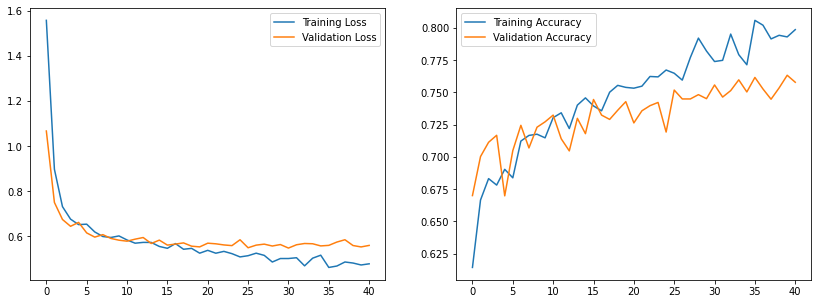

In [111]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(historyG20.history['loss'], label='Training Loss')
ax1.plot(historyG20.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(historyG20.history['accuracy'], label='Training Accuracy')
ax2.plot(historyG20.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [112]:
from sklearn.metrics import precision_score, recall_score, f1_score
probs = modelG20.predict(X_test, verbose=0)
classes = np.argmax(probs,axis=1)

# accuracy
loss, accuracy, precision, recall = modelG20.evaluate(X_test, y_test, verbose = 0)
print('Accuracy  : {:.4f}'.format(accuracy))
# precision tp / (tp + fp)
print('precision  : ',precision_score(y_test[:,1], classes))
# recall: tp / (tp + fn)
print('recall : ',recall_score(y_test[:,1], classes))
# f1: 2 tp / (2 tp + fp + fn)
print('f1 score : ',f1_score(y_test[:,1], classes))


Accuracy  : 0.7577
precision  :  0.7355714824594493
recall :  0.8084577114427861
f1 score :  0.7702942919217856


## **LSTM - using Word2Vec word embedding layer**

In [113]:
#B-LSTM- using GloVe word embedding layter
from keras.layers import Bidirectional, GlobalMaxPool1D, LSTM

modelW20=Sequential()

#embedding layer
modelW20.add(Embedding(max_words,300,weights=[embedding_matrix2],input_length=max_length,trainable=False)) 

#bidirectional LSTM layer
modelW20.add(LSTM(90, recurrent_activation = 'sigmoid', return_sequences=True, dropout = 0.1,
                               kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)))

#Global Max pooling layer
modelW20.add(tf.keras.layers.MaxPooling1D(padding = 'valid'))

modelW20.add(Flatten())
modelW20.add(Dense(185, activation = 'relu'))
modelW20.add(Dropout(0.3))
modelW20.add(Dense(2, activation='softmax'))

In [114]:
# Compiling the model
modelW20.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
               metrics = ['accuracy', Precision(), Recall()])
modelW20.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 845, 300)          9088200   
_________________________________________________________________
lstm_16 (LSTM)               (None, 845, 90)           140760    
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 422, 90)           0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 37980)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 185)               7026485   
_________________________________________________________________
dropout_23 (Dropout)         (None, 185)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 2)               

In [115]:
# Training the model
historyW20 = modelW20.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, steps_per_epoch = 50, verbose = 1, 
                    validation_data = (X_test, y_test),shuffle = True, callbacks=callbacks)

Epoch 1/50
50/50 [==============================] - 8s 119ms/step - loss: 2.9962 - accuracy: 0.5706 - precision_13: 0.5706 - recall_13: 0.5706 - val_loss: 1.2577 - val_accuracy: 0.6931 - val_precision_13: 0.6931 - val_recall_13: 0.6931
Epoch 2/50
50/50 [==============================] - 5s 108ms/step - loss: 1.1032 - accuracy: 0.6667 - precision_13: 0.6667 - recall_13: 0.6667 - val_loss: 0.7725 - val_accuracy: 0.7192 - val_precision_13: 0.7192 - val_recall_13: 0.7192
Epoch 3/50
50/50 [==============================] - 5s 107ms/step - loss: 0.7481 - accuracy: 0.7115 - precision_13: 0.7115 - recall_13: 0.7115 - val_loss: 0.6543 - val_accuracy: 0.7342 - val_precision_13: 0.7342 - val_recall_13: 0.7342
Epoch 4/50
50/50 [==============================] - 5s 107ms/step - loss: 0.6816 - accuracy: 0.7103 - precision_13: 0.7103 - recall_13: 0.7103 - val_loss: 0.6311 - val_accuracy: 0.7325 - val_precision_13: 0.7325 - val_recall_13: 0.7325
Epoch 5/50
50/50 [==============================] - 5s 1

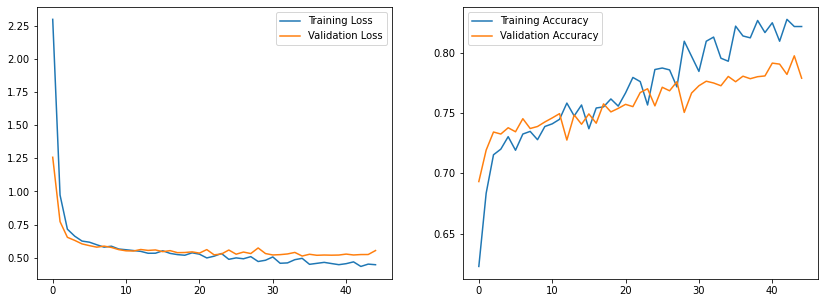

In [116]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(historyW20.history['loss'], label='Training Loss')
ax1.plot(historyW20.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(historyW20.history['accuracy'], label='Training Accuracy')
ax2.plot(historyW20.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [117]:
from sklearn.metrics import precision_score, recall_score, f1_score
probs = modelW20.predict(X_test, verbose=0)
classes = np.argmax(probs,axis=1)

# accuracy
loss, accuracy, precision, recall = modelW20.evaluate(X_test, y_test, verbose = 0)
print('Accuracy  : {:.4f}'.format(accuracy))
# precision tp / (tp + fp)
print('precision  : ',precision_score(y_test[:,1], classes))
# recall: tp / (tp + fn)
print('recall : ',recall_score(y_test[:,1], classes))
# f1: 2 tp / (2 tp + fp + fn)
print('f1 score : ',f1_score(y_test[:,1], classes))

Accuracy  : 0.7788
precision  :  0.8375
recall :  0.6944444444444444
f1 score :  0.7592928377153217


## **B-LSTM - using GloVe word embedding layer**

In [121]:
#B-LSTM- using GloVe word embedding layter
from keras.layers import Bidirectional, GlobalMaxPool1D, LSTM

modelG2=Sequential()

#embedding layer
modelG2.add(Embedding(max_words,100,weights=[embedding_matrix1],input_length=max_length,trainable=False)) 

#bidirectional LSTM layer
modelG2.add(Bidirectional(LSTM(90, recurrent_activation = 'sigmoid', return_sequences=True, dropout = 0.1,
                               kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))))

#Global Max pooling layer
modelG2.add(tf.keras.layers.MaxPooling1D(padding = 'valid'))

modelG2.add(Flatten())
modelG2.add(Dense(185, activation = 'relu'))
modelG2.add(Dropout(0.3))
modelG2.add(Dense(2, activation='softmax'))

In [122]:
# Compiling the model
modelG2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
               metrics = ['accuracy', Precision(), Recall()])
modelG2.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 845, 100)          3029400   
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 845, 180)          137520    
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 422, 180)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 75960)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 185)               14052785  
_________________________________________________________________
dropout_25 (Dropout)         (None, 185)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 2)               

In [123]:
from keras.callbacks import EarlyStopping
#add early stopping: stop training if val_loss hasn't decreased for 10 epochs
callbacks = [EarlyStopping(monitor='val_loss', patience = 10)]

In [124]:
# Training the model
historyG2 = modelG2.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, steps_per_epoch = 50, verbose = 1, 
                    validation_data = (X_test, y_test),shuffle = True, callbacks=callbacks)

Epoch 1/50
50/50 [==============================] - 11s 170ms/step - loss: 3.0756 - accuracy: 0.5733 - precision_15: 0.5733 - recall_15: 0.5733 - val_loss: 1.4754 - val_accuracy: 0.6656 - val_precision_15: 0.6656 - val_recall_15: 0.6656
Epoch 2/50
50/50 [==============================] - 8s 155ms/step - loss: 1.2792 - accuracy: 0.6680 - precision_15: 0.6680 - recall_15: 0.6680 - val_loss: 0.8865 - val_accuracy: 0.6927 - val_precision_15: 0.6927 - val_recall_15: 0.6927
Epoch 3/50
50/50 [==============================] - 8s 154ms/step - loss: 0.8426 - accuracy: 0.6761 - precision_15: 0.6761 - recall_15: 0.6761 - val_loss: 0.7196 - val_accuracy: 0.6967 - val_precision_15: 0.6967 - val_recall_15: 0.6967
Epoch 4/50
50/50 [==============================] - 8s 153ms/step - loss: 0.7209 - accuracy: 0.6835 - precision_15: 0.6835 - recall_15: 0.6835 - val_loss: 0.6661 - val_accuracy: 0.6990 - val_precision_15: 0.6990 - val_recall_15: 0.6990
Epoch 5/50
50/50 [==============================] - 8s 

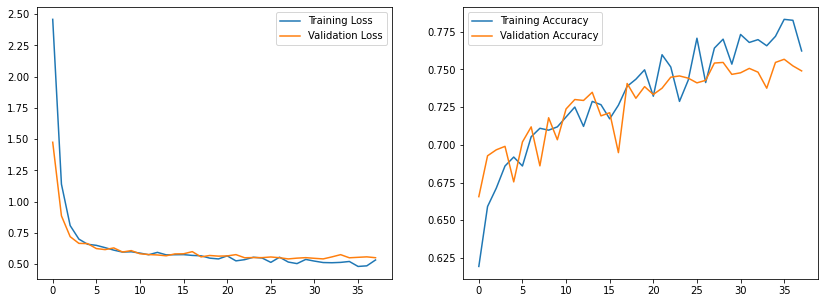

In [125]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(historyG2.history['loss'], label='Training Loss')
ax1.plot(historyG2.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(historyG2.history['accuracy'], label='Training Accuracy')
ax2.plot(historyG2.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score
probs = modelG2.predict(X_test, verbose=0)
classes = np.argmax(probs,axis=1)

# accuracy
loss, accuracy, precision, recall = modelG2.evaluate(X_test, y_test, verbose = 0)
print('Accuracy  : {:.4f}'.format(accuracy))
# precision tp / (tp + fp)
print('precision  : ',precision_score(y_test[:,1], classes))
# recall: tp / (tp + fn)
print('recall : ',recall_score(y_test[:,1], classes))
# f1: 2 tp / (2 tp + fp + fn)
print('f1 score : ',f1_score(y_test[:,1], classes))


Accuracy  : 0.7490
precision  :  0.7591240875912408
recall :  0.7330016583747927
f1 score :  0.7458342121915208


## **B-LSTM - using Word2Vec word embedding layer**

In [ ]:
#B-LSTM- using Word2Vec word embedding layter
from keras.layers import Bidirectional, GlobalMaxPool1D, LSTM

modelW2=Sequential()

#embedding layer
modelW2.add(Embedding(max_words,300,weights=[embedding_matrix2],input_length=max_length,trainable=False)) 

#bidirectional LSTM layer
modelW2.add(Bidirectional(LSTM(90, recurrent_activation = 'sigmoid', return_sequences=True, dropout = 0.1,
                               kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))))

#Global Max pooling layer
modelW2.add(tf.keras.layers.MaxPooling1D(padding = 'valid'))
modelW2.add(Flatten())
modelW2.add(Dense(185, activation = 'relu'))
modelW2.add(Dropout(0.3))
modelW2.add(Dense(2, activation='softmax'))

In [ ]:
# Compiling the model
modelW2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
               metrics = ['accuracy', Precision(), Recall()])
modelW2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 845, 300)          9088200   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 845, 180)          281520    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 422, 180)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 75960)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 185)               14052785  
_________________________________________________________________
dropout_5 (Dropout)          (None, 185)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

In [ ]:
# Training the model
historyW2 = modelW2.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, steps_per_epoch = 50, verbose = 1, 
                    validation_data = (X_test,y_test),shuffle = True, callbacks = callbacks)

Epoch 1/50
50/50 [==============================] - 13s 209ms/step - loss: 5.2867 - accuracy: 0.5508 - precision_5: 0.5508 - recall_5: 0.5508 - val_loss: 1.7807 - val_accuracy: 0.7031 - val_precision_5: 0.7031 - val_recall_5: 0.7031
Epoch 2/50
50/50 [==============================] - 9s 190ms/step - loss: 1.4170 - accuracy: 0.6560 - precision_5: 0.6560 - recall_5: 0.6560 - val_loss: 0.8019 - val_accuracy: 0.7138 - val_precision_5: 0.7138 - val_recall_5: 0.7138
Epoch 3/50
50/50 [==============================] - 9s 191ms/step - loss: 0.7759 - accuracy: 0.6706 - precision_5: 0.6706 - recall_5: 0.6706 - val_loss: 0.6497 - val_accuracy: 0.7256 - val_precision_5: 0.7256 - val_recall_5: 0.7256
Epoch 4/50
50/50 [==============================] - 9s 192ms/step - loss: 0.6239 - accuracy: 0.7287 - precision_5: 0.7287 - recall_5: 0.7287 - val_loss: 0.6039 - val_accuracy: 0.7246 - val_precision_5: 0.7246 - val_recall_5: 0.7246
Epoch 5/50
50/50 [==============================] - 9s 192ms/step - los

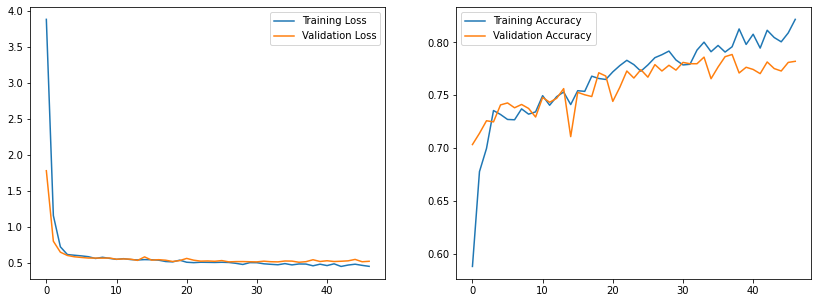

In [ ]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(historyW2.history['loss'], label='Training Loss')
ax1.plot(historyW2.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(historyW2.history['accuracy'], label='Training Accuracy')
ax2.plot(historyW2.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
probs = modelW2.predict(X_test, verbose=0)
classes = np.argmax(probs,axis=1)

# accuracy
loss, accuracy, precision, recall = modelW2.evaluate(X_test, y_test, verbose = 0)
print('Accuracy  : {:.4f}'.format(accuracy))
# precision tp / (tp + fp)
print('precision  : ',precision_score(y_test[:,1], classes))
# recall: tp / (tp + fn)
print('recall : ',recall_score(y_test[:,1], classes))
# f1: 2 tp / (2 tp + fp + fn)
print('f1 score : ',f1_score(y_test[:,1], classes))

Accuracy  : 0.7819
precision  :  0.8400597907324364
recall :  0.6990049751243781
f1 score :  0.7630685675492191


### **B-LSTM-CNN - using GloVe word embedding layer**

In [ ]:
modelG3=Sequential()

#embedding layer
modelG3.add(Embedding(max_words,100,weights=[embedding_matrix1],input_length=max_length,trainable=False)) 

#bidirectional LSTM layer
modelG3.add(Bidirectional(LSTM(90, recurrent_activation = 'sigmoid', return_sequences=True, dropout = 0.1,
                               kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))))

#convolutional layer
modelG3.add(tf.keras.layers.Conv1D(90,3, padding = 'valid',activation = 'relu'))
modelG3.add(Dropout(0.1))

#Global Max pooling layer
modelG3.add(tf.keras.layers.MaxPooling1D(padding = 'valid'))


modelG3.add(Flatten())
modelG3.add(Dense(185, activation = 'relu'))
modelG3.add(Dropout(0.3))
modelG3.add(Dense(2, activation='softmax'))

In [ ]:
# Compiling the model
modelG3.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
               metrics = ['accuracy', Precision(), Recall()])
modelG3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 845, 100)          3029400   
_________________________________________________________________
bidirectional_9 (Bidirection (None, 845, 180)          137520    
_________________________________________________________________
conv1d (Conv1D)              (None, 843, 90)           48690     
_________________________________________________________________
dropout_7 (Dropout)          (None, 843, 90)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 421, 90)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 37890)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 185)              

In [ ]:
from keras.callbacks import EarlyStopping
#add early stopping: stop training if val_loss hasn't decreased for 10 epochs
callbacks = [EarlyStopping(monitor='val_loss', patience = 10)]

In [ ]:
historyG3 = modelG3.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, steps_per_epoch = 50, verbose = 1, 
                    validation_data = (X_test, y_test),shuffle = True, callbacks=callbacks)

Epoch 1/50
50/50 [==============================] - 12s 179ms/step - loss: 3.0295 - accuracy: 0.5759 - precision_7: 0.5759 - recall_7: 0.5759 - val_loss: 1.4162 - val_accuracy: 0.6960 - val_precision_7: 0.6960 - val_recall_7: 0.6960
Epoch 2/50
50/50 [==============================] - 8s 162ms/step - loss: 1.2358 - accuracy: 0.6656 - precision_7: 0.6656 - recall_7: 0.6656 - val_loss: 0.8157 - val_accuracy: 0.7065 - val_precision_7: 0.7065 - val_recall_7: 0.7065
Epoch 3/50
50/50 [==============================] - 8s 162ms/step - loss: 0.7902 - accuracy: 0.6868 - precision_7: 0.6868 - recall_7: 0.6868 - val_loss: 0.6823 - val_accuracy: 0.7115 - val_precision_7: 0.7115 - val_recall_7: 0.7115
Epoch 4/50
50/50 [==============================] - 8s 162ms/step - loss: 0.6908 - accuracy: 0.6796 - precision_7: 0.6796 - recall_7: 0.6796 - val_loss: 0.6415 - val_accuracy: 0.7096 - val_precision_7: 0.7096 - val_recall_7: 0.7096
Epoch 5/50
50/50 [==============================] - 8s 162ms/step - los

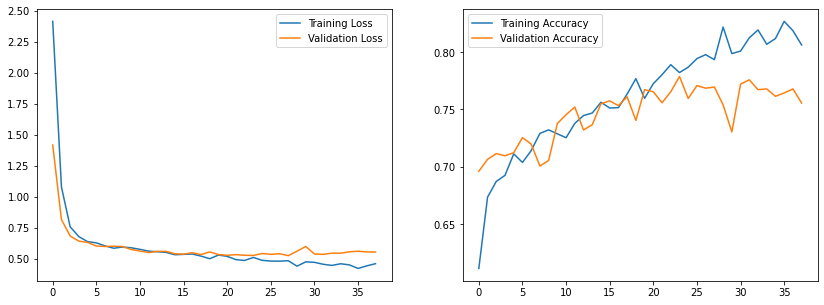

In [ ]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(historyG3.history['loss'], label='Training Loss')
ax1.plot(historyG3.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(historyG3.history['accuracy'], label='Training Accuracy')
ax2.plot(historyG3.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
probs = modelG3.predict(X_test, verbose=0)
classes = np.argmax(probs,axis=1)

# accuracy
loss, accuracy, precision, recall = modelG3.evaluate(X_test, y_test, verbose = 0)
print('Accuracy  : {:.4f}'.format(accuracy))
# precision tp / (tp + fp)
print('precision  : ',precision_score(y_test[:,1], classes))
# recall: tp / (tp + fn)
print('recall : ',recall_score(y_test[:,1], classes))
# f1: 2 tp / (2 tp + fp + fn)
print('f1 score : ',f1_score(y_test[:,1], classes))

Accuracy  : 0.7556
precision  :  0.764856776400171
recall :  0.7417081260364843
f1 score :  0.7531046095558831


### **B-LSTM-CNN - using Word2Vec word embedding layer**

In [ ]:
#B-LSTM-CNN- using Word2Vec word embedding layter
from keras.layers import Bidirectional, GlobalMaxPool1D, LSTM

modelW3=Sequential()

#embedding layer
modelW3.add(Embedding(max_words,300,weights=[embedding_matrix2],input_length=max_length,trainable=False)) 

#bidirectional LSTM layer
modelW3.add(Bidirectional(LSTM(90, recurrent_activation = 'sigmoid', return_sequences=True, dropout = 0.1,
                               kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))))
#convolutional layer
modelW3.add(tf.keras.layers.Conv1D(90,3, padding = 'valid',activation = 'relu'))
modelW3.add(Dropout(0.1))

#Global Max Pooling layer 
modelW3.add(tf.keras.layers.MaxPooling1D(padding = 'valid'))


modelW3.add(Flatten())
modelW3.add(Dense(185, activation = 'relu'))
modelW3.add(Dropout(0.3))
modelW3.add(Dense(2, activation='softmax'))

In [ ]:
# Compiling the model
modelW3.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
               metrics = ['accuracy', Precision(), Recall()])
modelW3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 845, 300)          9088200   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 845, 180)          281520    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 843, 90)           48690     
_________________________________________________________________
dropout_11 (Dropout)         (None, 843, 90)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 421, 90)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 37890)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 185)             

In [ ]:
historyW3 = modelW3.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, steps_per_epoch = 50, verbose = 1, 
                    validation_data = (X_test, y_test),shuffle = True, callbacks=callbacks)

Epoch 1/50
50/50 [==============================] - 13s 214ms/step - loss: 5.2727 - accuracy: 0.5665 - precision_9: 0.5665 - recall_9: 0.5665 - val_loss: 1.6955 - val_accuracy: 0.6919 - val_precision_9: 0.6919 - val_recall_9: 0.6919
Epoch 2/50
50/50 [==============================] - 10s 197ms/step - loss: 1.3345 - accuracy: 0.6989 - precision_9: 0.6989 - recall_9: 0.6989 - val_loss: 0.7827 - val_accuracy: 0.6908 - val_precision_9: 0.6908 - val_recall_9: 0.6908
Epoch 3/50
50/50 [==============================] - 10s 197ms/step - loss: 0.7337 - accuracy: 0.6996 - precision_9: 0.6996 - recall_9: 0.6996 - val_loss: 0.6228 - val_accuracy: 0.7367 - val_precision_9: 0.7367 - val_recall_9: 0.7367
Epoch 4/50
50/50 [==============================] - 10s 197ms/step - loss: 0.6301 - accuracy: 0.7205 - precision_9: 0.7205 - recall_9: 0.7205 - val_loss: 0.5992 - val_accuracy: 0.7252 - val_precision_9: 0.7252 - val_recall_9: 0.7252
Epoch 5/50
50/50 [==============================] - 10s 197ms/step -

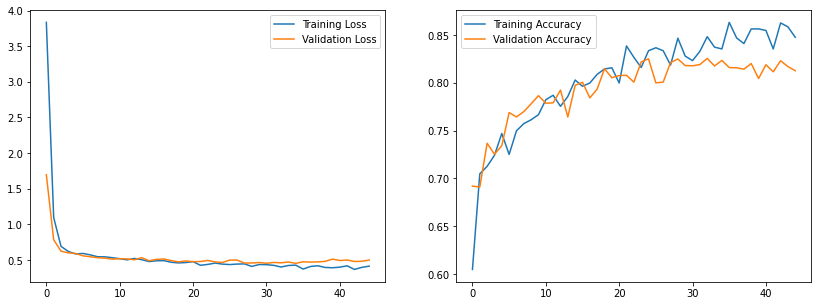

In [ ]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(historyW3.history['loss'], label='Training Loss')
ax1.plot(historyW3.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(historyW3.history['accuracy'], label='Training Accuracy')
ax2.plot(historyW3.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
probs = modelW3.predict(X_test, verbose=0)
classes = np.argmax(probs,axis=1)

# accuracy
loss, accuracy, precision, recall = modelW3.evaluate(X_test, y_test, verbose = 0)
print('Accuracy  : {:.4f}'.format(accuracy))
# precision tp / (tp + fp)
print('precision  : ',precision_score(y_test[:,1], classes))
# recall: tp / (tp + fn)
print('recall : ',recall_score(y_test[:,1], classes))
# f1: 2 tp / (2 tp + fp + fn)
print('f1 score : ',f1_score(y_test[:,1], classes))

Accuracy  : 0.8125
precision  :  0.868062317429406
recall :  0.7392205638474295
f1 score :  0.7984773846842812


## **B-LSTM-D-CNN - using Glove word embedding layer**

In [184]:
modelG4=Sequential()

#embedding layer
modelG4.add(Embedding(max_words,100,weights=[embedding_matrix1],input_length=max_length,trainable=False)) 

#bidirectional LSTM layer
modelG4.add(Bidirectional(LSTM(90, recurrent_activation = 'sigmoid', return_sequences=True, dropout = 0.1,
                               kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))))

#convolutional layer
#three parallel dilated 1-d convolutional layers
modelG4.add(tf.keras.layers.Conv1D(90,3, padding = "valid", dilation_rate = 1,activation = "relu"))
modelG4.add(tf.keras.layers.Conv1D(90,3, padding = "valid", dilation_rate = 2,activation = "relu"))
modelG4.add(tf.keras.layers.Conv1D(90,3, padding = "valid", dilation_rate = 4,activation = "relu", kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)))
modelG4.add(Dropout(0.1))

#Global Max pooling layer
modelG4.add(tf.keras.layers.MaxPooling1D(padding = 'valid'))

modelG4.add(Flatten())
modelG4.add(Dense(185, activation = 'relu'))
modelG4.add(Dropout(0.3))
modelG4.add(Dense(2, activation='softmax'))

In [185]:
# Compiling the model
modelG4.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
               metrics = ['accuracy', Precision(), Recall()])
modelG4.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 845, 100)          3029400   
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 845, 180)          137520    
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 843, 90)           48690     
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 839, 90)           24390     
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 831, 90)           24390     
_________________________________________________________________
dropout_34 (Dropout)         (None, 831, 90)           0         
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 415, 90)         

In [186]:
historyG4 = modelG4.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, steps_per_epoch = 50, verbose = 1, 
                    validation_data = (X_test, y_test),shuffle = True, callbacks=callbacks)

Epoch 1/50
50/50 [==============================] - 12s 189ms/step - loss: 3.6585 - accuracy: 0.5242 - precision_17: 0.5242 - recall_17: 0.5242 - val_loss: 1.5513 - val_accuracy: 0.6375 - val_precision_17: 0.6375 - val_recall_17: 0.6375
Epoch 2/50
50/50 [==============================] - 9s 173ms/step - loss: 1.2969 - accuracy: 0.6025 - precision_17: 0.6025 - recall_17: 0.6025 - val_loss: 0.8172 - val_accuracy: 0.6840 - val_precision_17: 0.6840 - val_recall_17: 0.6840
Epoch 3/50
50/50 [==============================] - 9s 173ms/step - loss: 0.7594 - accuracy: 0.6795 - precision_17: 0.6795 - recall_17: 0.6795 - val_loss: 0.6593 - val_accuracy: 0.6867 - val_precision_17: 0.6867 - val_recall_17: 0.6867
Epoch 4/50
50/50 [==============================] - 9s 172ms/step - loss: 0.6394 - accuracy: 0.6992 - precision_17: 0.6992 - recall_17: 0.6992 - val_loss: 0.6113 - val_accuracy: 0.7085 - val_precision_17: 0.7085 - val_recall_17: 0.7085
Epoch 5/50
50/50 [==============================] - 8s 

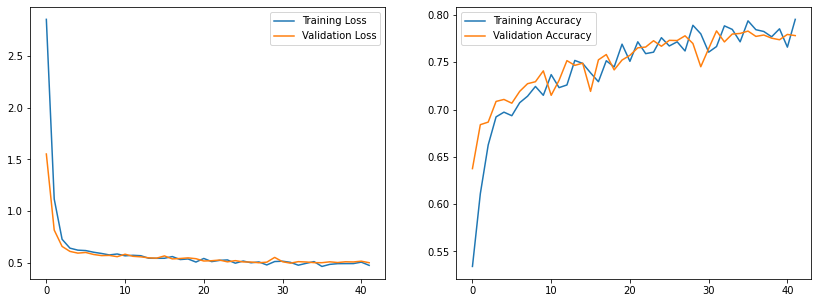

In [189]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(historyG4.history['loss'], label='Training Loss')
ax1.plot(historyG4.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(historyG4.history['accuracy'], label='Training Accuracy')
ax2.plot(historyG4.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [188]:
from sklearn.metrics import precision_score, recall_score, f1_score
probs = modelG4.predict(X_test, verbose=0)
classes = np.argmax(probs,axis=1)

# accuracy
loss, accuracy, precision, recall = modelG4.evaluate(X_test, y_test, verbose = 0)
print('Accuracy  : {:.4f}'.format(accuracy))
# precision tp / (tp + fp)
print('precision  : ',precision_score(y_test[:,1], classes))
# recall: tp / (tp + fn)
print('recall : ',recall_score(y_test[:,1], classes))
# f1: 2 tp / (2 tp + fp + fn)
print('f1 score : ',f1_score(y_test[:,1], classes))

Accuracy  : 0.7781
precision  :  0.7793446702613024
recall :  0.7790215588723052
f1 score :  0.7791830810698737


## **B-LSTM-D-CNN - using Word2Vec word embedding layer**

In [190]:
modelW4=Sequential()

#embedding layer
modelW4.add(Embedding(max_words,300,weights=[embedding_matrix2],input_length=max_length,trainable=False)) 

#bidirectional LSTM layer
modelW4.add(Bidirectional(LSTM(90, recurrent_activation = 'sigmoid', return_sequences=True, dropout = 0.1,
                               kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))))

#convolutional layer
#three parallel dilated 1-d convolutional layers
modelW4.add(tf.keras.layers.Conv1D(90,3, padding = "valid", dilation_rate = 1,activation = "relu"))
modelW4.add(tf.keras.layers.Conv1D(90,3, padding = "valid", dilation_rate = 2,activation = "relu"))
modelW4.add(tf.keras.layers.Conv1D(90,3, padding = "valid", dilation_rate = 4,activation = "relu", kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)))
modelW4.add(Dropout(0.1))

#Global Max pooling layer
modelW4.add(tf.keras.layers.MaxPooling1D(padding = 'valid'))

modelW4.add(Flatten())
modelW4.add(Dense(185, activation = 'relu'))
modelW4.add(Dropout(0.3))
modelW4.add(Dense(2, activation='softmax'))

In [191]:
# Compiling the model
modelW4.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
               metrics = ['accuracy', Precision(), Recall()])
modelW4.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 845, 300)          9088200   
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 845, 180)          281520    
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 843, 90)           48690     
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 839, 90)           24390     
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 831, 90)           24390     
_________________________________________________________________
dropout_36 (Dropout)         (None, 831, 90)           0         
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 415, 90)         

In [192]:
historyW4 = modelW4.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, steps_per_epoch = 50, verbose = 1, 
                    validation_data = (X_test, y_test),shuffle = True, callbacks=callbacks)

Epoch 1/50
50/50 [==============================] - 14s 224ms/step - loss: 5.9135 - accuracy: 0.5330 - precision_18: 0.5330 - recall_18: 0.5330 - val_loss: 1.8382 - val_accuracy: 0.5892 - val_precision_18: 0.5892 - val_recall_18: 0.5892
Epoch 2/50
50/50 [==============================] - 10s 206ms/step - loss: 1.4241 - accuracy: 0.6646 - precision_18: 0.6646 - recall_18: 0.6646 - val_loss: 0.7858 - val_accuracy: 0.7154 - val_precision_18: 0.7154 - val_recall_18: 0.7154
Epoch 3/50
50/50 [==============================] - 10s 207ms/step - loss: 0.7479 - accuracy: 0.6984 - precision_18: 0.6984 - recall_18: 0.6984 - val_loss: 0.6412 - val_accuracy: 0.7021 - val_precision_18: 0.7021 - val_recall_18: 0.7021
Epoch 4/50
50/50 [==============================] - 10s 207ms/step - loss: 0.6259 - accuracy: 0.7175 - precision_18: 0.7175 - recall_18: 0.7175 - val_loss: 0.6041 - val_accuracy: 0.7158 - val_precision_18: 0.7158 - val_recall_18: 0.7158
Epoch 5/50
50/50 [==============================] - 

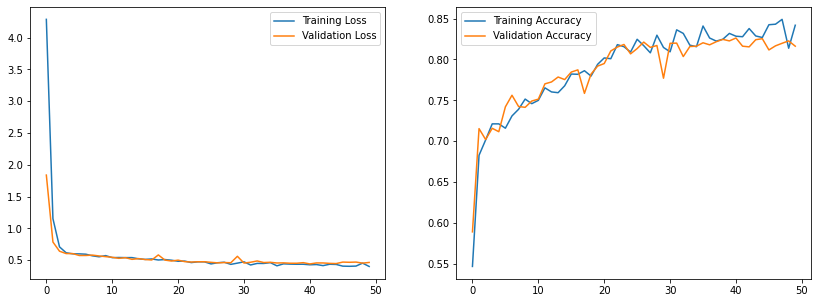

In [195]:
# plotting some curves related to model's performance
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(historyW4.history['loss'], label='Training Loss')
ax1.plot(historyW4.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(historyW4.history['accuracy'], label='Training Accuracy')
ax2.plot(historyW4.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [196]:
from sklearn.metrics import precision_score, recall_score, f1_score
probs = modelW4.predict(X_test, verbose=0)
classes = np.argmax(probs,axis=1)

# accuracy
loss, accuracy, precision, recall = modelW4.evaluate(X_test, y_test, verbose = 0)
print('Accuracy  : {:.4f}'.format(accuracy))
# precision tp / (tp + fp)
print('precision  : ',precision_score(y_test[:,1], classes))
# recall: tp / (tp + fn)
print('recall : ',recall_score(y_test[:,1], classes))
# f1: 2 tp / (2 tp + fp + fn)
print('f1 score : ',f1_score(y_test[:,1], classes))

Accuracy  : 0.8163
precision  :  0.8067361668003208
recall :  0.8341625207296849
f1 score :  0.8202201386057887


## **7) Experimental Results**

**7.1) Results of All Methods using GloVe Word Embedding**

Below is the table showing the accuracy, precision, recall and f1 score for all my models using GloVe word embedding. 

CNN achieves the lowest Accuracy and F1 Score while B-LSTM-D-CNN achieves the highest Accuracy and F1 Score.

Furthmore, with the strategy adopted to reduce overfitting:dropout, early stopping and l2 regularization, all models do not show particular overfitting issues. 

In [3]:
#results of all the methods for using GloVe word embedding 
methods = ['CNN','D-CNN','LSTM','B-LSTM','B-LSTM-CNN','B-LSTM-D-CNN' ]
acc = [0.7398,0.7506,0.7577,0.7490,0.7556,0.7781]
pre =[0.7800,0.7570,0.7356,0.7591,0.7649,0.7793]
recall =[0.6716,0.7417,0.8084,0.7330,0.7417,0.7790]
f1 =[0.7217,0.7493,0.7703,0.7458,0.7531,0.7792]

data = {'Method': methods, 'Accuracy': acc, 'Precision': pre, 'Recall': recall, 'F1 Score':f1}
results = pd.DataFrame(data, columns = ['Method','Accuracy','Precision','Recall','F1 Score'])
print(results)

         Method  Accuracy  Precision  Recall  F1 Score
0           CNN    0.7398     0.7800  0.6716    0.7217
1         D-CNN    0.7506     0.7570  0.7417    0.7493
2          LSTM    0.7577     0.7356  0.8084    0.7703
3        B-LSTM    0.7490     0.7591  0.7330    0.7458
4    B-LSTM-CNN    0.7556     0.7649  0.7417    0.7531
5  B-LSTM-D-CNN    0.7781     0.7793  0.7790    0.7792


**7.2) Results of All Methods using Word2Vec Word Embedding**

Below is the table showing the accuracy, precision, recall and f1 score for all my models using Word2Vec word embedding.

CNN achieves the lowest Accuracy and F1 Score while B-LSTM-D-CNN achieves the highest Accuracy and F1 Score.

Furthmore, with the strategy adopted to reduce overfitting:dropout, early stopping and l2 regularization, all models do not show particular overfitting issues.

In [4]:
#results of all the methods for using GloVe word embedding 
methods = ['CNN','D-CNN','LSTM','B-LSTM','B-LSTM-CNN','B-LSTM-D-CNN' ]
acc = [0.7898,0.7971,0.7788,0.7819,0.8125,0.8163]
pre =[0.8387,0.7974,0.8375,0.8401,0.8681,0.8067]
recall =[0.7201,0.7993,0.6944,0.6990,0.7392,0.8342]
f1 =[0.7749,0.7983,0.7593,0.7631,0.7985,0.8202]

data = {'Method': methods, 'Accuracy': acc, 'Precision': pre, 'Recall': recall, 'F1 Score':f1}
results = pd.DataFrame(data, columns = ['Method','Accuracy','Precision','Recall','F1 Score'])
print(results)

         Method  Accuracy  Precision  Recall  F1 Score
0           CNN    0.7898     0.8387  0.7201    0.7749
1         D-CNN    0.7971     0.7974  0.7993    0.7983
2          LSTM    0.7788     0.8375  0.6944    0.7593
3        B-LSTM    0.7819     0.8401  0.6990    0.7631
4    B-LSTM-CNN    0.8125     0.8681  0.7392    0.7985
5  B-LSTM-D-CNN    0.8163     0.8067  0.8342    0.8202


**7.3) Overall Results and Response to Claims**

**Response to Claim 1**

For both GloVe and Word2Vec word embedding layer, we can observe that Dilated-CNN outperforms CNN in Accuracy and F1 Score.

Although CNN has less connections which takes less time to train, and it can easily identify a catchphrase in the natural text which is required in sentiment analysis, this cannot commpensate for the fact that it fails to handle long term semantic features over input sequence. With D-CNN, it can expand the size of receptive fields at the exponential level without concerning additional parameters. Thus, it becomes feasible for the dilated convolution to capture long term semantic information. This can indiate that capturing long term semantic information is crucial in sentiment analysis. Furthermore, it eliminates the implications of information loss, which is due to downsampling pooling operations and likewise in the stride convolution happenning in CNN.

**Response to Claim 2**

For GloVe word embedding layer, it is observed that B-LSTM performs worse than LSTM. However, for Word2Vec word embedding layer, B-LSTM outperforms LSTM. This can due to the fact that LSTM using GloVe word embedding layer may require more hidden neurons or layers than B-LSTM. That could be the reason why LSTM performs worse than B-LSTM. Logically, for sentiment analysis, the text vector input is from left to right. we would want to use both right and left context for the current prediction of a word in order to cover the full meaning of the word used in the context. Thus, I think B-LSTM should still be employed to improve the performance on sentiment analysis. 

**Response to Claim 3**

For both GloVe and Word2Vec word embedding layer, we can observe that B-LSTM-CNN outperforms B-LSTM in all metrics. This is because the bidirectional LSTM layer is generating a new encoding for the original input. The output of the bidirectional LSTM layer is then fed into a convolution layer which will extract local features. Thus, B-LSTM-CNN is able to extract both long term semantics features and local features. Having these two can achieve a higher accuracy as long term senmantic features contain a larger amount of sequential information while local features contain catchphrase in natural text. 

**Response to Claim 4**

For both GloVe and Word2Vec word embedding layer, yy proposed new model B-LSTM-D-CNN outperforms all models in Accuracy and F1 Score. As I mentioned above, having a B-LSTM can capture long term semantics features, then feeding into the three parallel dilated convolutional layers which support exponential expansion of the receptive field with same computation and memory costs while also preserving information and extracting local features. Thus B-LSTM-D-CNN can capture even more long term senmantic features than B-LSTM-CNN. However, we have to be cautious in using dilation rate. Increasing dilation rates too much can fail to aggregate local features (catchphrase in text) due to sparsity of the kernel. Thus, we cannot use a high dilation rate. 

**GloVe VS Word2Vec**

For all the models, using Word2Vec word embedding layer achieves higher Accuracy and F1 Score than using GloVe word embedding. This could be due to the nature of the dataset is used in the experiment here. As the datasets used here are comments regarding the General Elections Held In India - 2019. As this topic is not very diverse, words being used may not be as diverse and there could be many same words very frequently exisitng in many comments. GloVe gives lower weight for highly frequent word pairs to prevent them from dominating the training progress. However, these highly frequent word may be deemed as important in this dataset. That could be one reason why GloVe performs worse than Word2Vec. Furthermore, the GloVe word embedding used here is of 100-dimension while the Word2Vec word embedding used here is of 300-dimension. Having a higher dimension can capture more information which lead to better perofrmance but increasing computational cost.

Therefore, the reasons why Word2Vec outperforms GloVe here depends on the nature of the dataset used here as well as the dimensional difference. 


## **8) Conclusion**

This report has successfully adopted the model proposed by (Song, Zhao, Liu, & Zhao, 2018) and  (Alam, Abid, Guangpei, & Yunrong, 2020)'s papers as well as a self-proposed model: B-LSTM-D-CNN. This model which is built based on the models prposed from the two papers achieved the highest accuracy. This shows that a lot of on going research still need to be done in deep learning in social media sentiment analysis as there are still rooms for improvement.

Furthermore, all models used here (except for CNN) which target long term senmantic features outperform CNN which only target local features. This shows that if having to choose either long term senmantic feature or local feature to be used in sentiment classification, long term senmantic feature will win. If not having to choose either one, a combination of both actually outperforms using only either one. The experimental results of B-LSTM-CNN and B-LSTM-D-CNN confirm this. 

My appropach is restricted to a single-subject based collection of comments of Reddit that can be expanded in future work. Furthremore, the performance of all the models can also be evaluated using word embedding layers like FastText vother than GloVe and Word2Vec. My work motivates researchers to consider the current research and propose more innovative and scientifically useful deep learning based models for social media sentiment analysis.



## **9) References**
[1] Haque, Md & Salma, Haque & Lima, Akter & Zaman, Sadia & Rajshahi, Bangladesh 
& Rajshahi,. (2020). Performance Analysis of Different Neural Networks for Sentiment Analysis on IMDb Movie Reviews.

[2] Alam, M., Abid, F., Guangpei, C., & Yunrong, L. (2020, February 19). Social media sentiment analysis through parallel dilated convolutional neural network for smart city applications. Retrieved March 14, 2021, from https://www.sciencedirect.com/science/article/pii/S0140366419320031#b43


[3] Basiri, M., Nemati, S., Abdar, M., Cambria, E.; Acharya, U. (2020, September 03). ABCDM: An Attention-based Bidirectional CNN-RNN deep model for sentiment analysis. Retrieved March 14, 2021, from https://www.sciencedirect.com/science/article/pii/S0167739X20309195

[4] Zhang, Y., & Wallace, B. (2016, April 06). A sensitivity analysis of (AND Practitioners' GUIDE TO) convolutional neural networks for Sentence Classification. Retrieved April 06, 2021, from https://arxiv.org/abs/1510.03820


[5] A, C. (2019, November 28). Twitter and Reddit sentimental ANALYSIS DATASET. Retrieved April 08, 2021, from https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset

[6] Song, M., Zhao, X., Liu, Y., &amp; Zhao, Z. (2018, September). Text Sentiment Analysis Based on Convolutional Neural Network and Bidirectional LSTM Model. Retrieved April 8, 2021, from https://link.springer.com/chapter/10.1007%2F978-981-13-2206-8_6

[7] Long, F., Zhou, K., &amp; Ou, W. (2019, September). Sentiment analysis of text based on bidirectional lstm with multi-head attention. Retrieved April 09, 2021, from https://ieeexplore.ieee.org/abstract/document/8845615

[8] Jang, B., Kim, M., Harerimana, G., Kang, S., &amp; Kim, J. (2020, August). Bi-LSTM Model to Increase Accuracy in Text Classification: Combining Word2vec CNN and Attention Mechanism. Retrieved April 10, 2021, from https://www.researchgate.net/publication/343846800_Bi-LSTM_Model_to_Increase_Accuracy_in_Text_Classification_Combining_Word2vec_CNN_and_Attention_Mechanism

[9] Pennington, J. (2015). GloVe: Global vectors for word representation. Retrieved April 13, 2021, from https://nlp.stanford.edu/projects/glove/

